## Rotten Tomatoes Movie Reviews
#### What aspects of a movie causes it to have high Rotten Tomato ratings?
#### Can you predict a rotten tomato rating for a movie given historical data?

* Samuel Lee
* Kevin Ma
* Akash Nivarthi
* Nathan Souder

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
dfmv = pd.read_csv('rotten_tomatoes_movies.csv')

In [ ]:
dfmv.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


# Domain
## Overview

* Rotten Tomatoes: popular movie and TV review site
* Focuses on critic and audience opinions of movies
* **Domain: Movie review sites**
    * IMDb - movie info and opinions from moviegoers
    * Metacritic - multimedia reviews from critics
    * letterboxd - social networking through movie reviews
* **Subdomain: Rotten Tomatoes**
    * Offers critic AND audience ratings
    * Our dataset is based on the number of critics, not the average critical score
* **This dataset: Rotten Tomatoes movie reviews up to late October 2020**

The domain we are working in is Movie Rating Sources. In addition to critiques and ratings from local sources like newspaper sections there are a large number of websites and blogs that provide information on how well a movie can be expected to be received by an audience member. Among movie rating and review websites, the three most consulted are International Movie Database (IMDb), Rotten Tomatoes, and Metacritic. The data we are working with specifically is from Rotten Tomatoes. While the other two options, IMDb and Metacritic, are good options to browse ratings from either movie goers or critics, Rotten Tomatoes is the only of the three that offers both options. In addition, Rotten Tomatoes features three distinct rating features: a Rotten Tomato score, a critic rating, and an audience rating. While our data does not specifically feature the critic rating out of ten that the website offers, we do have data on the number of critics that contribute to that rating. The strongest argument for the use of Rotten Tomato data is that it provides a larger range of data than any other largely reputable rating/review source.

### Rotten Tomatoes Layout

![title](Forrest_Gump_1.PNG)

![title](Forrest_Gump_2.PNG)

![title](Forrest_Gump_3.PNG)

![title](Forrest_Gump_4.PNG)

# Data

### Dataset Columns

In [ ]:
dfmv.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [ ]:
for col in dfmv:
    print('{}:\n\t{}\n'.format(col, dfmv.loc[0, col]))
#dfmv.iloc[0:1]

rotten_tomatoes_link:
	m/0814255

movie_title:
	Percy Jackson & the Olympians: The Lightning Thief

movie_info:
	Always trouble-prone, the life of teenager Percy Jackson (Logan Lerman) gets a lot more complicated when he learns he's the son of the Greek god Poseidon. At a training ground for the children of deities, Percy learns to harness his divine powers and prepare for the adventure of a lifetime: he must prevent a feud among the Olympians from erupting into a devastating war on Earth, and rescue his mother from the clutches of Hades, god of the underworld.

critics_consensus:
	Though it may seem like just another Harry Potter knockoff, Percy Jackson benefits from a strong supporting cast, a speedy plot, and plenty of fun with Greek mythology.

content_rating:
	PG

genres:
	Action & Adventure, Comedy, Drama, Science Fiction & Fantasy

directors:
	Chris Columbus

authors:
	Craig Titley, Chris Columbus, Rick Riordan

actors:
	Logan Lerman, Brandon T. Jackson, Alexandra Daddario, Jake

In [ ]:
for col in dfmv:
    print('{}:\n\t{}\n'.format(col, dfmv.loc[0, col]))

rotten_tomatoes_link:
	m/0814255

movie_title:
	Percy Jackson & the Olympians: The Lightning Thief

movie_info:
	Always trouble-prone, the life of teenager Percy Jackson (Logan Lerman) gets a lot more complicated when he learns he's the son of the Greek god Poseidon. At a training ground for the children of deities, Percy learns to harness his divine powers and prepare for the adventure of a lifetime: he must prevent a feud among the Olympians from erupting into a devastating war on Earth, and rescue his mother from the clutches of Hades, god of the underworld.

critics_consensus:
	Though it may seem like just another Harry Potter knockoff, Percy Jackson benefits from a strong supporting cast, a speedy plot, and plenty of fun with Greek mythology.

content_rating:
	PG

genres:
	Action & Adventure, Comedy, Drama, Science Fiction & Fantasy

directors:
	Chris Columbus

authors:
	Craig Titley, Chris Columbus, Rick Riordan

actors:
	Logan Lerman, Brandon T. Jackson, Alexandra Daddario, Jake

### Column Explanations
#### Movie Information

##### 'movie_title':
* Title of the film, not consistently the original release title
* The RT website _does_ seem to list the original release title though (see _Star Wars_ (1977))

##### 'movie_info':
* A passage containing film's synopsis shown under "Movie Info" on RT
* We could search for keywords in this paragraph to highlight topics that appear in well-received movies

##### 'content_rating': 
* MPA age rating for the movie during its US theatrical release

##### 'genres'
* Alphabetical list of genres that the movie fits into 

##### 'directors'
* Director(s) of the film, the people who guide the general vision of the story, acting, and crew's decisions
* Some directors are held to high regarde and may be known for making consistently good films
* Chris Columbus is famous for well-received family films (Harry Potter 1-2), but _Percy Jackson_ is an infamously badly-received exception

##### 'authors'
* The writers of the film - seems to include authors of screenplay, story, and source material
* Writers can control finer details of the story, though directors and actors are often the "draw" to a movie
* The Percy Jackson film shows the writer, but also novel author, who was not involved with the film 

##### 'actors'
* Actors in the film, sometimes shown in billing order or in order of character importance in this dataset
* RT website seems to use billing order (see _Star Wars: The Force Awakens_, listed in character, not billing order in this set)
* Top-billing actors can draw in audiences due to their "star power"
    * Does the presence popular actors help us predict a movie's Tomatometer score?
    
##### 'production_company'
* Seems to instead refer to distribution company - company that released the film to cinema or home video (e.g. limited release films, Netflix originals, some foreign films)
* We may use these terms interchangeably during analysis

##### 'original_release_date'
* Seems to be the wide theatrical release date for the film
* Some films show a US theatrical release date even if the film released widely earlier in another country (e.g. _Mr. Bean's Holiday_)

##### 'streaming_release_date'
* Date that the film released on streaming
* This data may be unreliable - we see streaming release dates back to 1998, which seems unlikely
* Some films have only streaming, but not "original" release dates, which seem to be straight-to-streaming or home video releases

##### 'runtime'
* Length of movie (minutes), seems to be for original release (_Star Wars_ uses its original 1977 runtime)



### Scores and Reviews

##### 'rotten_tomatoes_link'
* The part of the url after www.rottentomatoes.com/
* Unique for each movie (may help with indexing)

### The Critics

##### 'tomatometer_rating'
* The percentage value behind the 'tomatometer_status' symbol
* Shows the average percentage of critics who gave the film a favorable review
* Not equal to the average _score_ from each critic (displayed separately on the site, not in this dataset)

##### 'tomatometer_status'
* The most famous aspect of the website
* Symbol uses different states of a tomato
* This symbol forms regions within the 'tomatometer_rating' percentage
    * **Rotten:** < 60% of critics' reviews are favorable
    * **Fresh:** >= 60% of critics' reviews are favorable
    * **Certified Fresh:** consistently...
        * At least 75% Tomatometer score, with
        * \>= 5 reviews from top critics
        * \>= 80 reviews from critics (wide release) or >= 40 reviews from critics (limited release)

##### 'critics_consensus': 
* A blurb summarizing the critics' general opinion of the film, often highlighting the strengths or flaws of the movie

##### 'tomatometer_count'
* Number of critics who reviewed the movie on the website

##### 'tomatometer_top_critics_count'
* Number of "Top Critics" (highly reputable, vetted critics) who have reviewed the film on the website
* A subset of 'tomatometer_count'

##### 'tomatometer_fresh_critics_count'
* Number of critics who gave the film a positive review (seems to be at least 2.5 of 5 stars)
    * "would recommend watching this movie"

##### 'tomatometer_rotten_critics_count'
* Number of critics who gave the film a negative review
    * "would not recommend watching this movie"
* 'tomatometer_count' is the sum of 'tomatometer_rotten_critics_count' and 'tomatometer_fresh_critics_count'

## The Audience

##### 'audience_rating'
* Percentage of audience contributors (unvetted people with accounts on RT) who gave a favorable review
* Actually refers to the "audience score" on RT
* Not equal to the "average rating" of the audience scores on the site

##### 'audience_status'
* Audience contributor counterpart to 'tomatometer_status'
* Symbol uses different states of a popcorn box
    * **Spilled:** < 60% of audience ratings are favorable
    * **Upright:** >= 60% of audience ratings are favorable
    
##### 'audience_count'
* Number of audience members who reviewed/rated the movie on rottentomatoes.com
* Not as secure as critic contribution, can be manipulated
    * RT recently added stronger regulations to reduce "review bombing" campaigns to unfairly inflate audience scores

# Insights

## Initial Check - Correlations Between Variables

<AxesSubplot:>

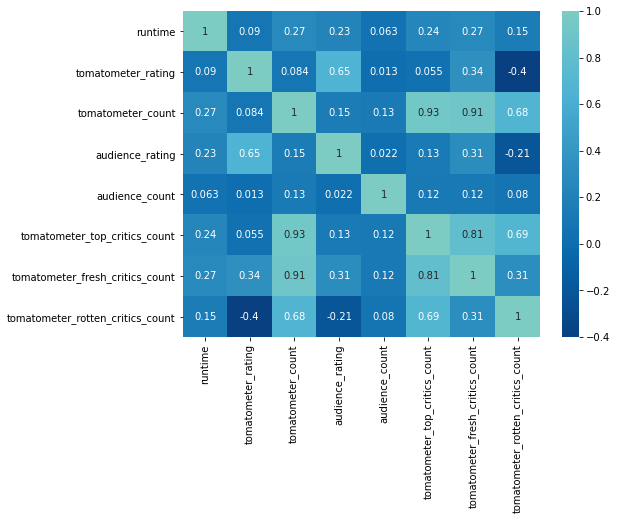

In [ ]:
correlations = dfmv.corr()
fig = plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='GnBu_r', center=1)

Audience rating has a positive correlation with tomatometer rating (0.65). Tomatometer fresh critics count has a relatively positive correlation with tomatometer rating in that it has a 0.34 correlation. Tomatometer rotten critics count has a decent negative correlation with the tomatometer rating in that it has a -0.4 correlation with it.  This verifies the expectation that the Tomatometer rating is based on fresh critics count and rotten critics count. And this can be seen below when we plotted the fresh critic counts divided by the total count, and it had a completely linear correlation.

## Verifying Our Expectations
### Tomatometer vs. Fresh Critic Count

Text(0, 0.5, 'tomatometer rating')

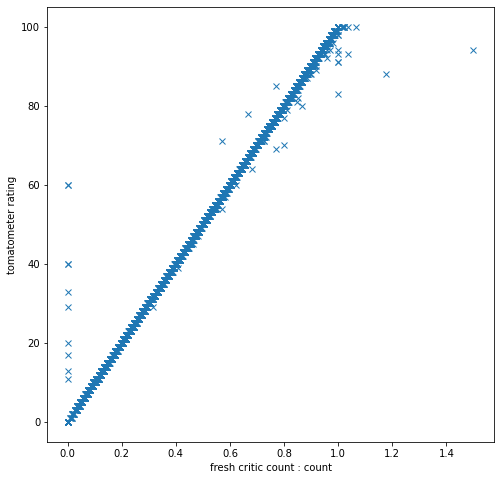

In [ ]:
plt.figure(figsize = (8, 8))
plt.plot( dfmv['tomatometer_fresh_critics_count'].values/dfmv['tomatometer_count'].values, dfmv['tomatometer_rating'].values, 'x')
plt.xlabel('fresh critic count : count')
plt.ylabel('tomatometer rating')

## Critic and Audience Responses

### Tomatometer Box Plot

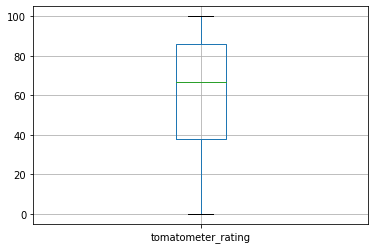

In [ ]:
dfmv.boxplot(column='tomatometer_rating', return_type='axes');

The 25th percentile tomatometer rating is roughly 40, and the 75th percentile is roughly 80. The mean tomatometer rating is about 65.

### Number of Fresh Reviews vs. Audience Count

Text(0, 0.5, 'fresh critics tomatometer')

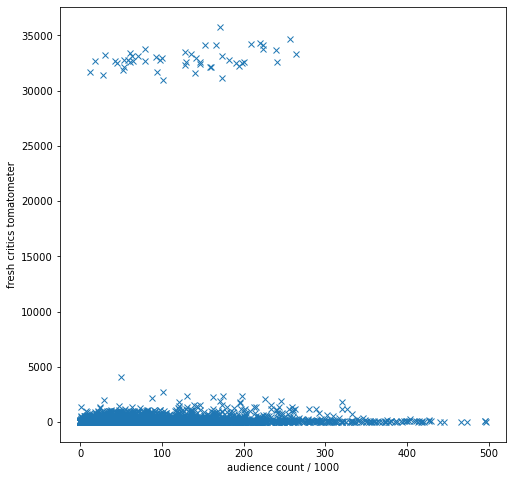

In [ ]:
plt.figure(figsize = (8, 8))
plt.plot( dfmv['tomatometer_fresh_critics_count'].values, dfmv['audience_count'].values/1000,'x')
plt.xlabel('audience count / 1000')
plt.ylabel('fresh critics tomatometer')

Using the Tomatometer Rating intead of Fresh Critics would lets us scale down unusually high reviewer counts.

### Critic vs. Audience Opinions

Text(0, 0.5, 'tomatometer rating')

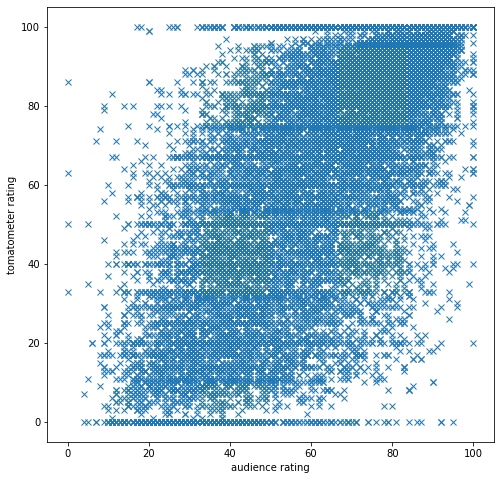

In [ ]:
plt.figure(figsize = (8, 8))
plt.plot( dfmv['audience_rating'].values, dfmv['tomatometer_rating'].values, 'x')
plt.xlabel('audience rating')
plt.ylabel('tomatometer rating')

There is a generally positive correlation between audience rating and tomatometer rating, and this can be useful when we are looking at historical data that could be used to predict tomatometer rating.

### Critic vs. Audience Opinions - Popular Movies

In [ ]:
# Narrow down to only popular movies to see if there are any strong correlations
dfmv_popular = dfmv.loc[dfmv['audience_count'] > 100000]

Text(0, 0.5, 'tomatometer rating')

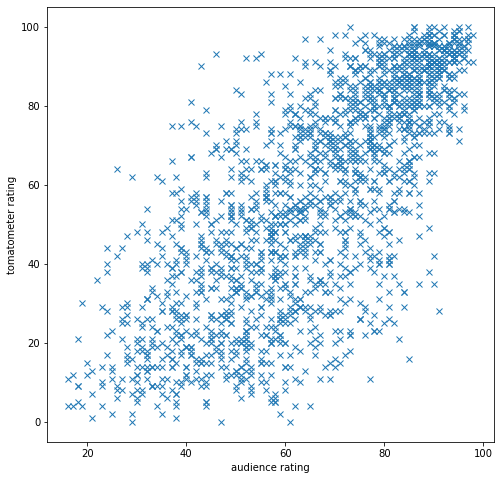

In [ ]:
plt.figure(figsize = (8, 8))
plt.plot( dfmv_popular['audience_rating'].values, dfmv_popular['tomatometer_rating'].values, 'x')
plt.xlabel('audience rating')
plt.ylabel('tomatometer rating')

One interesting thing to note is that audiences and critics are more likely to see eye to eye when the ratings are really positive. So, when a movie is really good, people are more likely to agree that it is really good. However, audiences and tomatometer critics start diverging in opinion as the ratings decrease on both end.

### Positive Audience Responses

In [ ]:
# Only "upright" movies (60% of audience ratings were positive)
dfmv90 = dfmv.loc[dfmv['audience_rating'] > 60]

In [ ]:
# Only the outliers - unusually high audience count that we saw earlier
dfmv90.loc[dfmv90['audience_count']>(2*10**7)]

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
701,m/1017776-rocky,Rocky,"Rocky Balboa (Sylvester Stallone), a small-tim...",This story of a down-on-his-luck boxer is thor...,PG,"Drama, Sports & Fitness",John G. Avildsen,Sylvester Stallone,"Sylvester Stallone, Talia Shire, Burt Young, C...",1976-11-21,...,United Artists,Certified-Fresh,94.0,65.0,Upright,69.0,33403994.0,11,61,4
1051,m/1065684-braveheart,Braveheart,Tells the story of the legendary thirteenth ce...,"Distractingly violent and historically dodgy, ...",R,"Action & Adventure, Classics, Drama",Mel Gibson,Randall Wallace,"Mel Gibson, Sophie Marceau, Patrick McGoohan, ...",1995-05-26,...,Paramount Pictures,Certified-Fresh,78.0,82.0,Upright,85.0,32708456.0,27,64,18
1310,m/10_things_i_hate_about_you,10 Things I Hate About You,"Kat Stratford (Julia Stiles) is beautiful, sma...",Julia Stiles and Heath Ledger add strong perfo...,PG-13,Comedy,Gil Junger,"Karen McCullah Lutz, Kirsten Smith","Larisa Oleynik, Julia Stiles, Heath Ledger, An...",1999-03-31,...,Buena Vista Pictures,Fresh,69.0,78.0,Upright,69.0,32104911.0,19,54,24
2009,m/50_first_dates,50 First Dates,Playboy vet Henry sets his heart on romancing ...,Gross-out humor overwhelms the easy chemistry ...,PG-13,Comedy,Peter Segal,George Wing,"Adam Sandler, Drew Barrymore, Rob Schneider, S...",2004-02-13,...,Sony Pictures,Rotten,45.0,176.0,Upright,65.0,32700188.0,41,79,97
2662,m/american_pie,American Pie,A riotous and raunchy exploration of the most ...,"So embarrassing it's believable, American Pie ...",R,Comedy,"Paul Weitz, Chris Weitz","Adam Herz, Paul Weitz","Jason Biggs, Mena Suvari, Alyson Hannigan, Sha...",1999-07-09,...,Universal Pictures,Fresh,61.0,129.0,Upright,61.0,33781574.0,29,79,50
4579,m/chronicles_of_narnia_lion_witch_wardrobe,"The Chronicles of Narnia: The Lion, The Witch ...","During the World War II bombings of London, fo...",With first-rate special effects and compelling...,PG,"Kids & Family, Science Fiction & Fantasy",Andrew Adamson,"Ann Peacock, Andrew Adamson, Christopher Marku...","Georgie Henley, Skandar Keynes, William Mosele...",2005-12-09,...,Buena Vista,Certified-Fresh,76.0,218.0,Upright,61.0,34105114.0,48,166,52
5632,m/donnie_darko,Donnie Darko,"In a funny, moving and distinctly mind-bending...",Richard Kelly's debut feature Donnie Darko is ...,R,"Comedy, Mystery & Suspense, Science Fiction & ...",Richard Kelly,Richard Kelly,"Jake Gyllenhaal, Jena Malone, Mary McDonnell, ...",2001-01-19,...,Newmarket Film Group,Certified-Fresh,86.0,117.0,Upright,80.0,30984568.0,16,101,16
6095,m/et_the_extraterrestrial,E.T. The Extra-Terrestrial,After a gentle alien becomes stranded on Earth...,Playing as both an exciting sci-fi adventure a...,PG,"Kids & Family, Science Fiction & Fantasy",Steven Spielberg,Melissa Mathison,"Henry Thomas, Drew Barrymore, Dee Wallace, Rob...",1982-06-11,...,Universal Pictures,Certified-Fresh,98.0,130.0,Upright,72.0,32314349.0,37,128,2
6453,m/finding_nemo,Finding Nemo,"Marlin (Albert Brooks), a clown fish, is overl...",Breathtakingly lovely and grounded by the stel...,G,"Animation, Comedy, Kids & Family","Andrew Stanton, Lee Unkrich","Bob Peterson, David Reynolds, Andrew Stanton, ...","Albert Brooks, Ellen DeGeneres, Alexander Goul...",2003-05-30,...,Walt Disney Pictures,Certified-Fresh,99.0,266.0,Upright,86.0,33356856.0,61,264,2
7052,m/gladiator,Gladiator,Commodus (Joaquin Phoenix) takes power and str...,Ridley Scott and an excellent cast successfull...,R,"Action & Adventure, Classics, Drama",Ridley Scott,"David H. Franzoni, William Nicholson, John Logan","Russell Crowe, Joaquin Phoenix, Connie Nielsen...",2000-05-05,...,Dreamworks Distribution LLC,Certified-Fresh,77.0,199.0,Uprigh

Many of these movies are majorly popular in pop culture. Some films here, like _Spider-Man_ and _Revenge of the Sith_, have cult followings with fanbases who may artificially inflate the number of reviews that go to a movie. Other films, like _Titanic_, marked important points in film/culture, which may explain their position here.

### Audience Count, Excluding Outliers

Text(0, 0.5, 'tomatometer rating')

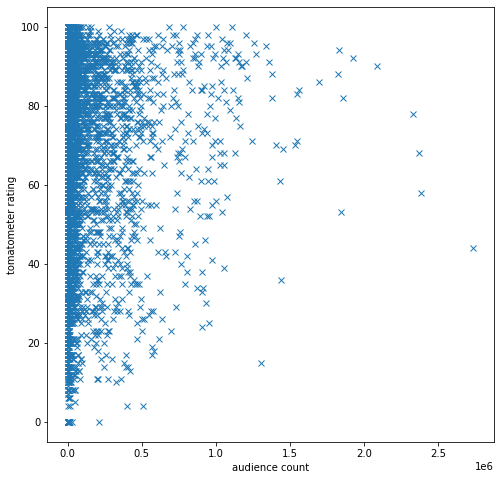

In [ ]:
dfmv_check = dfmv90.loc[dfmv['audience_count']<(2*10**7)]
plt.figure(figsize = (8, 8))
plt.plot( dfmv_check['audience_count'].values, dfmv_check['tomatometer_rating'].values, 'x')
plt.xlabel('audience count')
plt.ylabel('tomatometer rating')

Not many correlations between audience count and tomatometer rating.

## Effect of Contributors

In [ ]:
# Number of unique directors
dfmv['directors'].nunique()

8933

### Actors
We anticipate that the first actor of the list of actors is the main character at least for the popular movies. The first actor in the list tends to be the top-billed actor.

In [ ]:
# Listing actors
dfmv['actors_list'] = dfmv.actors.str[0:-1].str.split(',').tolist()
dfmv['actors_list']

0        [Logan Lerman,  Brandon T. Jackson,  Alexandra...
1        [Catherine Keener,  Amanda Peet,  Oliver Platt...
2        [Dudley Moore,  Bo Derek,  Julie Andrews,  Rob...
3        [Martin Balsam,  John Fiedler,  Lee J. Cobb,  ...
4        [James Mason,  Kirk Douglas,  Paul Lukas,  Pet...
                               ...                        
17707    [Daniel Valdez,  Edward James Olmos,  Charles ...
17708    [J.K. Simmons,  Kristen Bell,  Octavia Spencer...
17709    [Anthony Quinn,  Alan Bates,  Irene Papas,  Li...
17710    [Stanley Baker,  Jack Hawkins,  Ulla Jacobsson...
17711    [Burt Lancaster,  Peter O'Toole,  Simon Ward, ...
Name: actors_list, Length: 17712, dtype: object

In [ ]:
# Storing the first actor
dfmv['main_actor'] = dfmv['actors_list'].apply(lambda  x : x[0] if type(x) == list else x)
dfmv['main_actor']

0            Logan Lerman
1        Catherine Keener
2            Dudley Moore
3           Martin Balsam
4             James Mason
               ...       
17707       Daniel Valdez
17708        J.K. Simmons
17709       Anthony Quinn
17710       Stanley Baker
17711      Burt Lancaster
Name: main_actor, Length: 17712, dtype: object

In [ ]:
# Unique lead actors
dfmv['main_actor'].nunique()

7958

#### Limiting to Popular Movies

In [ ]:
# We will look at only widely-viewed, critically-acclaimed movies
dfmv_limitnew = dfmv[(dfmv['audience_count'] > 500000) & (dfmv['tomatometer_rating'] >= 70)]
dfmv_limitnew.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,actors_list,main_actor
213,m/10010667-hangover,The Hangover,"Two days before his wedding, Doug (Justin Bart...",With a clever script and hilarious interplay a...,R,Comedy,Todd Phillips,"Jon Lucas, Todd Phillips, Scott Moore","Bradley Cooper, Ed Helms, Zach Galifianakis, J...",2009-06-05,...,78.0,239.0,Upright,84.0,943179.0,51,187,52,"[Bradley Cooper, Ed Helms, Zach Galifianakis...",Bradley Cooper
701,m/1017776-rocky,Rocky,"Rocky Balboa (Sylvester Stallone), a small-tim...",This story of a down-on-his-luck boxer is thor...,PG,"Drama, Sports & Fitness",John G. Avildsen,Sylvester Stallone,"Sylvester Stallone, Talia Shire, Burt Young, C...",1976-11-21,...,94.0,65.0,Upright,69.0,33403994.0,11,61,4,"[Sylvester Stallone, Talia Shire, Burt Young...",Sylvester Stallone
749,m/101_dalmatians,101 Dalmatians,"In a Disney animation classic, Dalmatian Pongo...",With plenty of pooches and a memorable villain...,G,"Animation, Classics, Comedy, Kids & Family, My...","Clyde Geronimi, Hamilton S. Luske, Wolfgang Re...",Bill Peet,"Betty Lou Gerson, Cate Bauer, Frederick Worloc...",1961-01-25,...,98.0,51.0,Upright,76.0,709291.0,7,50,1,"[Betty Lou Gerson, Cate Bauer, Frederick Wor...",Betty Lou Gerson
833,m/1029112-alice_in_wonderland,Alice in Wonderland,Lewis Carroll's beloved fantasy tale is brough...,A good introduction to Lewis Carroll's classic...,G,"Animation, Classics, Comedy, Kids & Family, Sc...","Clyde Geronimi, Wilfred Jackson, Hamilton Luske","Winston Hibler, Bill Peet, Joe Grant, Aldous H...","Kathryn Beaumont, Ed Wynn, Richard Haydn, Ster...",1951-07-28,...,81.0,32.0,Upright,78.0,574325.0,6,26,6,"[Kathryn Beaumont, Ed Wynn, Richard Haydn, ...",Kathryn Beaumont
849,m/1031385-jungle_book,The Jungle Book,In this classic Walt Disney animation based on...,"With expressive animation, fun characters, and...",PG,"Action & Adventure, Animation, Kids & Family, ...",Wolfgang Reitherman,"Larry Clemmons, Ken Anderson, Vance Gerry, Ral...","Bruce Reitherman, Louis Prima, Sterling Hollow...",1967-10-18,...,88.0,40.0,Upright,82.0,715040.0,5,35,5,"[Bruce Reitherman, Louis Prima, Sterling Hol...",Bruce Reitherman


Generally, the most popular and highly-rated movies have actors that we have seen before. 

In [ ]:
# Movies with high audience count
dfmv_onlypopular = dfmv[(dfmv['audience_count']>250000)]

# See if the main actor has an effect on tomatometer rating
dfmv_actor_group = dfmv_onlypopular.groupby('main_actor').aggregate({'tomatometer_rating':np.median})

dfmv_actor_group.head(20)

,tomatometer_rating
main_actor,
Aaron Eckhart,86.0
Aaron Taylor-Johnson,76.0
Adam Sandler,36.0
Adewale Akinnuoye-Agbaje,34.0
Adriana Caselotti,98.0
Adrien Brody,85.0
Al Pacino,82.0
Albert Brooks,99.0
Albert Finney,57.0


We initially considered movies with high audience counts, but we found that this skewed toward movies in pop culture, which does not necessarily correlate to critical acclaim (tomatometer rating). 

#### Actors without Popularity Threshold

In [ ]:
# See if the main actor has an effect on tomatometer rating
dfmv_actor_group = dfmv.groupby('main_actor').aggregate({'tomatometer_rating':np.median})

In [ ]:
print('Median Tomatometer ratings of actors:')
for actor in ['Tom Hanks', 'Tom Cruise', 'Olivia Colman', 'Ben Affleck', 'Keanu Reeves', 'Florence Pugh', 'Brad Pitt']:
    print('* {}: {}'.format(actor, dfmv_actor_group.loc[actor, 'tomatometer_rating']))

Median Tomatometer ratings of actors:
* Tom Hanks: 71.0
* Tom Cruise: 65.0
* Olivia Colman: 76.0
* Ben Affleck: 43.0
* Keanu Reeves: 43.0
* Florence Pugh: 85.5
* Brad Pitt: 66.0


We noticed that popular actors tend to appear in popular movies, which may affect the ratings. We also noticed that some very good actors have low median tomatometer ratings, and this might just be due to the sheer amount of movies that famous actors have acted in. However, who the main actor is seems to have an effect on the median Tomatometer rating, and this aspect of a movie could potentially affect whether or not a movie will receive a high rotten tomato rating.
<!-- - *Side Note*
- My boy Tom Hanks has a rating of 71 <3 
- All my homies dislike Tom Cruise though -->

In [ ]:
# Narrowing down popularity using the definition of Tomatometer
# More than 5 Top Critics 
dfmv_popularTopCritic = dfmv[(dfmv['tomatometer_top_critics_count']>5)]

## Distribution/Production Companies

In [ ]:
# Some distribution companies were listed under multiple different names/divisions
set(dfmv[dfmv.loc[:, 'production_company'].str[0:4] == '20th']['production_company'])

{'20th Century Fox',
 '20th Century Fox Distribution',
 '20th Century Fox Film',
 '20th Century Fox Film Corp.',
 '20th Century Fox Film Corporat',
 '20th Century Fox Film Corporation',
 '20th Century Fox Television',
 '20th Century Fox/Emerging Pictures',
 '20th Century Fox/Regency Films',
 '20th Century-Fox'}

### # Abbreviate production companies to the first four characters to help with grouping

Note that some companies were listed in ways that didn't work with this approach

(e.g. '20th Century Fox' vs. 'Fox')

In [ ]:

dfmv['prod_comp_short'] = dfmv.production_company.str.replace(' ', '').str[0:4]
dfmv['prod_comp_short']

0        20th
1        Sony
2        Wane
3        Crit
4        Disn
         ... 
17707    MCAU
17708    Walt
17709     Fox
17710    Para
17711    Tang
Name: prod_comp_short, Length: 17712, dtype: object

In [ ]:
# Number of distinct production companies
# Testing with median scores to avoid outliers affecting the tomatometer rating performance
dfgrp_prd = dfmv.groupby(['prod_comp_short']).agg({'audience_rating':np.median, 'tomatometer_rating': np.median, 'audience_count': np.mean}) 
dfgrp_prd

,audience_rating,tomatometer_rating,audience_count
prod_comp_short,,,
101S,88.0,56.0,626.000000
108P,41.0,13.0,1014.000000
1091,76.5,83.0,49.000000
10We,68.0,33.0,735.000000
120D,26.0,0.0,8762.000000
...,...,...,...
isot,50.0,67.0,136.000000
leve,54.5,75.0,1032.500000
nWav,47.0,44.0,2843.000000


In [ ]:
dfgrp_prd.sort_values(["audience_rating"], ascending = (False))

,audience_rating,tomatometer_rating,audience_count
prod_comp_short,,,
Alta,100.0,100.0,13.0
Pull,100.0,100.0,5.0
41/2,100.0,79.0,5.0
BigM,100.0,100.0,25.0
Pago,100.0,100.0,7.0
...,...,...,...
Quot,NaN,NaN,NaN
Ultr,NaN,88.0,NaN
WLIW,NaN,92.0,NaN


^We noticed some companies with very few audience reviews.
These favorable reviews may just be a niche audience reviewing one movie.

The same may apply with critic ratings, but critics' scores are more reputable and are what affects the tomatometer.

In [ ]:
dfgrp_prd.sort_values(['tomatometer_rating'], ascending=False)

,audience_rating,tomatometer_rating,audience_count
prod_comp_short,,,
Hier,NaN,100.0,NaN
Fair,81.0,100.0,1060.0
Apha,44.0,100.0,650.0
Pyed,89.0,100.0,110.0
Joch,86.0,100.0,929.0
...,...,...,...
Atel,NaN,NaN,NaN
BeYo,NaN,NaN,NaN
Plau,NaN,NaN,NaN


We limited our search to production companies with larger audiences
This weeds out the companies that may skew our understanding of the data

In [ ]:
dfnwgrp1 = dfgrp_prd.loc[dfgrp_prd['audience_count'] > 10000]
dfnwgrp1

,audience_rating,tomatometer_rating,audience_count
prod_comp_short,,,
20th,62.0,56.0,440049.515400
21La,82.0,94.0,83315.000000
7-57,48.0,64.0,12623.000000
A24F,62.0,87.5,22922.750000
ABKC,89.0,83.0,13032.000000
...,...,...,...
Work,53.5,58.0,14476.500000
Yari,52.5,36.5,75220.642857
Zeni,89.0,100.0,14329.000000


In [ ]:
# Popular companies with highest audience ratings
dfnwgrp1.sort_values(['audience_rating'], ascending=False).head(10)

,audience_rating,tomatometer_rating,audience_count
prod_comp_short,,,
Shin,95.0,100.0,68945.0
Almi,95.0,97.0,644753.0
NewZ,95.0,93.0,29689.0
ENIC,94.0,98.0,34207.0
CICC,94.0,100.0,14223.0
Zwei,93.0,100.0,25338.0
BFIP,93.0,100.0,11745.0
B4UE,93.0,95.0,19739.0
Toku,92.5,94.0,45492.5


In [ ]:
# Popular companies with highest tomatometer ratings
dfnwgrp1.sort_values(["tomatometer_rating"], ascending=False).head(10)

,audience_rating,tomatometer_rating,audience_count
prod_comp_short,,,
Shin,95.0,100.0,68945.0
Dhar,88.0,100.0,28886.0
CBS,75.0,100.0,85520.0
BFIP,93.0,100.0,11745.0
Zwei,93.0,100.0,25338.0
Zeni,89.0,100.0,14329.0
CICC,94.0,100.0,14223.0
Turt,80.0,98.0,24667.0
NCM,87.0,98.0,24845.0


In [ ]:
# Production companies with niche audiences
dfnwgrp2 = dfgrp_prd.loc[dfgrp_prd['audience_count'] < 100]
dfnwgrp2

,audience_rating,tomatometer_rating,audience_count
prod_comp_short,,,
1091,76.5,83.0,49.0
2203,71.0,75.0,70.0
26Ke,31.0,21.0,75.0
3:1C,60.0,0.0,31.0
40Ac,61.0,93.0,42.0
...,...,...,...
Wetl,40.0,40.0,26.0
Woma,50.0,78.0,8.0
YouK,60.0,100.0,97.0


In [ ]:
# Audience-acclaimed niche production companies
dfnwgrp2.sort_values(["audience_rating"], ascending=False).head(10)

,audience_rating,tomatometer_rating,audience_count
prod_comp_short,,,
Alta,100.0,100.0,13.0
BigM,100.0,100.0,25.0
Floa,100.0,91.0,14.0
41/2,100.0,79.0,5.0
Pago,100.0,100.0,7.0
Pull,100.0,100.0,5.0
Save,100.0,50.0,7.0
RYOT,97.0,100.0,36.0
Griz,95.0,100.0,40.0


In [ ]:
# Critically acclaimed niche companies
dfnwgrp2.sort_values(["tomatometer_rating"], ascending=False)

,audience_rating,tomatometer_rating,audience_count
prod_comp_short,,,
LARo,67.0,100.0,95.000000
Alta,100.0,100.0,13.000000
Come,89.0,100.0,56.333333
Coff,49.0,100.0,64.000000
Pago,100.0,100.0,7.000000
...,...,...,...
Tomo,33.0,8.0,59.000000
E-TP,62.0,0.0,48.000000
Cork,31.0,0.0,38.000000


After trimming down the audience count to be greater than 10000, we noticed that there are around 248 production companies who have audience counts that are less than 1000. There are also 141 production companies that have less than 100 audience counts.

However, cases like these cannot be solved at easily with our current method.

In [ ]:
set(dfmv[dfmv['production_company'].str.contains("Fox", na=False)]['production_company'])

{'20th Century Fox',
 '20th Century Fox Distribution',
 '20th Century Fox Film',
 '20th Century Fox Film Corp.',
 '20th Century Fox Film Corporat',
 '20th Century Fox Film Corporation',
 '20th Century Fox Television',
 '20th Century Fox/Emerging Pictures',
 '20th Century Fox/Regency Films',
 '20th Century-Fox',
 'Blue Fox Entertainment',
 'Blue Sky Studio/20th Century Fox',
 'Fox',
 'Fox 21',
 'Fox Atomic',
 'Fox Broadcasting Company',
 'Fox Faith',
 'Fox Faith Films',
 'Fox Film Corporation',
 'Fox Films',
 'Fox Home Entertainment',
 'Fox International',
 'Fox Lorber',
 'Fox Meadow Films',
 'Fox Network',
 'Fox Searchlight',
 'Fox Searchlight Pictures',
 'Fox Searchlight Pictures, Film4 and Waypoint',
 'Fox Walden',
 'Twentieth Century Fox',
 'Twentieth Century Fox Film Cor',
 'Twentieth Century Fox Home Entertainment',
 'Twentieth Century-Fox Film Corp.'}

In [ ]:
set(dfmv[dfmv['production_company'].str.contains("Disney", na=False)]['production_company'])

{'Disney',
 'Disney Channel',
 'Disney Pixar',
 'Disney Toon Studios',
 'Disney/Marvel',
 'Disney/Pixar',
 'DisneyToon Studios',
 'Disneynature',
 'IMAX/Walt Disney Pictures',
 'The Walt Disney Company',
 'Walt Disney',
 'Walt Disney Animation Canada',
 'Walt Disney Animation Studios',
 'Walt Disney Feature Animation',
 'Walt Disney Films',
 'Walt Disney Home Entertainment',
 'Walt Disney Home Video',
 'Walt Disney Pictures',
 'Walt Disney Pictures [us]',
 'Walt Disney Pictures/PIXAR',
 'Walt Disney Productions',
 'Walt Disney Studios',
 'Walt Disney Studios Home Entertainment',
 'Walt Disney Television Animation',
 'Yash Raj Films/Walt Disney Films'}

### Average Tomatometer per Company For Popular Movies Only

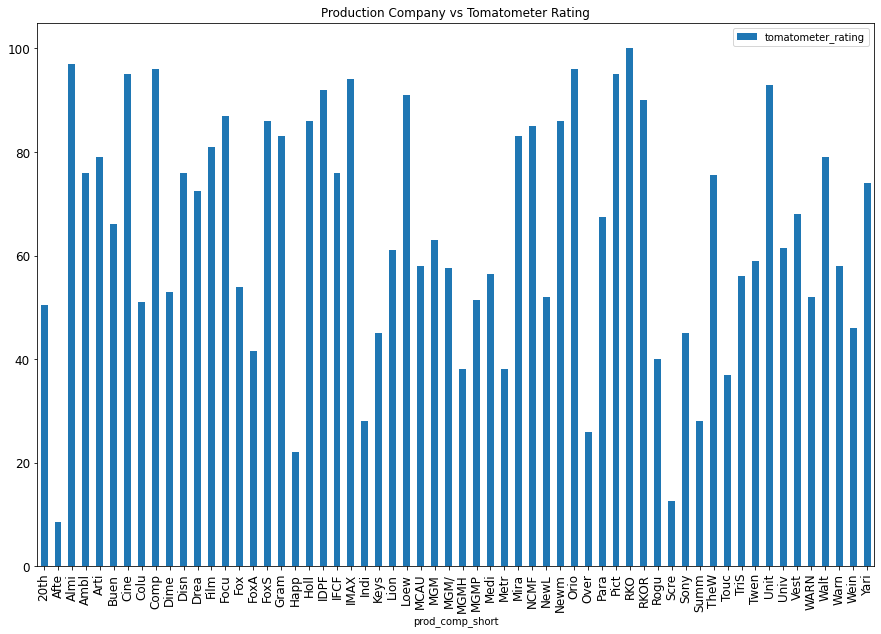

In [ ]:
dfmv_onlypopular = dfmv[(dfmv['audience_count']>250000)]
dfmv_prod_group = dfmv_onlypopular.groupby('prod_comp_short').aggregate({'tomatometer_rating':np.median})
ax = dfmv_prod_group[['tomatometer_rating']].plot(kind='bar', title ="Production Company vs Tomatometer Rating", figsize=(15, 10), legend=True, fontsize=12)

This bar graphs shows that production companies do have an effect on tomatometer rating. Production companies like Disney tend to perform very well in tomatometer ratings. Therefore, the production companies are likely to be an aspect of a movie that could cause it to have a high Rotten Tomato rating.

## Release Date

In [ ]:
# Searching for discrepancy between older and newer movies.
# See if audience rating vs critic rating are affected by the release year.

# create column for release year
dfmv['release_date'] = pd.to_datetime(dfmv['original_release_date'])
dfmv['release_year']=dfmv["release_date"].dt.year
dfmv['release_month'] = dfmv['release_date'].dt.month
dfmv['release_day'] = dfmv['release_date'].dt.day

In [ ]:
dfmv['release_month_name'] = dfmv['release_date'].dt.month_name()

In [ ]:
dfmv.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,actors_list,main_actor,prod_comp_short,release_date,release_year,release_month,release_day,release_month_name
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,73,76,"[Logan Lerman, Brandon T. Jackson, Alexandra...",Logan Lerman,20th,2010-02-12,2010.0,2.0,12.0,February
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,123,19,"[Catherine Keener, Amanda Peet, Oliver Platt...",Catherine Keener,Sony,2010-04-30,2010.0,4.0,30.0,April
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,16,8,"[Dudley Moore, Bo Derek, Julie Andrews, Rob...",Dudley Moore,Wane,1979-10-05,1979.0,10.0,5.0,October
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,54,0,"[Martin Balsam, John Fiedler, Lee J. Cobb, ...",Martin Balsam,Crit,1957-04-13,1957.0,4.0,13.0,April
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,24,3,"[James Mason, Kirk Douglas, Paul Lukas, Pet...",James Mason,Disn,1954-01-01,1954.0,1.0,1.0,January


In [ ]:
dfmv['genres'].nunique()
# The genres are an alphabetical list, not sorted by relevance

1106

In [ ]:
dfmv.isna().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
actors_list                          352
main_actor                           352
prod_comp_short 

Something interesting to note is that there are more original release dates with NaN than there are with streaming release dates with NaN. This is where we noticed that some movies released directly to streaming.

### Grouping with Release Dates

In [ ]:
# Grouping by release date
dfgrp_dt = dfmv.groupby(['release_date']).agg({'audience_rating':np.mean, 'tomatometer_rating': np.mean, 'audience_count': np.mean, 'release_month': np.mean, 'release_day': np.mean})

In [ ]:
dfgrp_dt

,audience_rating,tomatometer_rating,audience_count,release_month,release_day
release_date,,,,,
1914-06-01,69.0,96.0,1155.00,6.0,1.0
1915-01-01,53.0,83.0,1220.00,1.0,1.0
1915-03-03,56.0,93.0,4804.00,3.0,3.0
1916-09-05,77.0,97.0,4908.00,9.0,5.0
1919-05-13,71.0,95.0,3802.00,5.0,13.0
...,...,...,...,...,...
2020-09-04,59.0,84.4,38.25,9.0,4.0
2020-09-11,76.0,65.0,37.00,9.0,11.0
2020-09-18,57.0,94.0,234.00,9.0,18.0


### Number of Movies Released in Each Month

(array([437.,   0., 385.,   0., 468.,   0., 465.,   0., 456.,   0., 536.,
          0., 445.,   0., 486.,   0., 503.,   0., 544.,   0., 468.,   0.,
        611.]),
 array([ 1.        ,  1.47826087,  1.95652174,  2.43478261,  2.91304348,
         3.39130435,  3.86956522,  4.34782609,  4.82608696,  5.30434783,
         5.7826087 ,  6.26086957,  6.73913043,  7.2173913 ,  7.69565217,
         8.17391304,  8.65217391,  9.13043478,  9.60869565, 10.08695652,
        10.56521739, 11.04347826, 11.52173913, 12.        ]),
 <BarContainer object of 23 artists>)

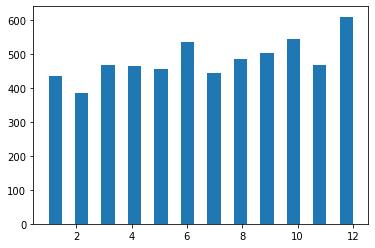

In [ ]:
# Counting movies by month
x = dfgrp_dt['release_month']
plt.hist(x, bins=23)

### Movie Reception by Month

<AxesSubplot:xlabel='audience_rating', ylabel='tomatometer_rating'>

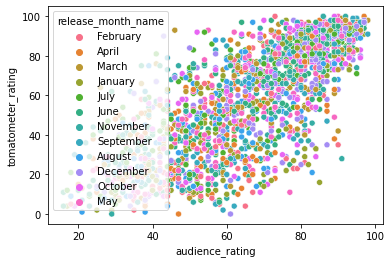

In [ ]:
# Considering only popular movies to reduce noise
dfmv_limit = dfmv[dfmv['audience_count'] > 100000]
sns.scatterplot(data = dfmv_limit, x = 'audience_rating', y = 'tomatometer_rating', hue = 'release_month_name')

We did not see any clustering of critical reception based on release month.

### Number of Movies Released on Each Day of the Month

(array([601., 168., 148., 141., 164., 367., 169., 188., 199., 181., 374.,
        216., 187., 206., 191., 386., 201., 185., 179., 176., 412., 165.,
        166., 164., 270.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ,
        14.2, 15.4, 16.6, 17.8, 19. , 20.2, 21.4, 22.6, 23.8, 25. , 26.2,
        27.4, 28.6, 29.8, 31. ]),
 <BarContainer object of 25 artists>)

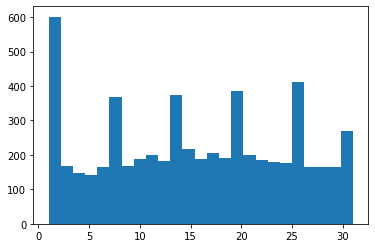

In [ ]:
# Counting movies released on each day of the month
plt.hist(dfgrp_dt['release_day'], bins = 25)

For some reason a lot of movies are the released on the first day. This could mean that they have data on the release month, but they did not have data on the release day. We also see spikes at 7, 14, 19, 26, and 31, which could be a result of rounding dates in some way. Additionally, we had also initially expected that movies would just be released theatrically in the US on Fridays, which would not show consistent dates over the years.

### Checking Missing Date Data

We noticed a spike in "January 1" and "\[Month\] 1" dates, which seemed to be a result of missing data on the month and/or date. We wanted to verify this.

In [ ]:
df_only_jan1 = dfmv[(dfmv['release_month'] <= 1) & (dfmv['release_day'] <= 1)]
df_only_jan1.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,actors_list,main_actor,prod_comp_short,release_date,release_year,release_month,release_day,release_month_name
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,24,3,"[James Mason, Kirk Douglas, Paul Lukas, Pet...",James Mason,Disn,1954-01-01,1954.0,1.0,1.0,January
21,m/10003876-man_hunt,Man Hunt,Renowned big-game hunter Captain Thorndike (Wa...,NaN,NR,"Classics, Drama, Mystery & Suspense",Fritz Lang,Dudley Nichols,"Walter Pidgeon, Joan Bennett, George Sanders, ...",1941-01-01,...,11,1,"[Walter Pidgeon, Joan Bennett, George Sander...",Walter Pidgeon,Twen,1941-01-01,1941.0,1.0,1.0,January
52,m/1000626-all_about_eve,All About Eve,Backstage story revolving around aspiring actr...,"Smart, sophisticated, and devastatingly funny,...",PG,"Classics, Drama",Joseph L. Mankiewicz,Joseph L. Mankiewicz,"Bette Davis, Anne Baxter, Gary Merrill, George...",1950-01-01,...,76,1,"[Bette Davis, Anne Baxter, Gary Merrill, Ge...",Bette Davis,20th,1950-01-01,1950.0,1.0,1.0,January
62,m/10006588-street_fight,Street Fight,Documentarian Marshall Curry chronicles the 20...,Street Fight takes an immersive ground-level l...,NR,"Documentary, Special Interest",Marshall Curry,Marshall Curry,"Cory Booker, Sharpe James, Pablo Fonseca, Rich...",2005-01-01,...,22,0,"[Cory Booker, Sharpe James, Pablo Fonseca, ...",Cory Booker,Mars,2005-01-01,2005.0,1.0,1.0,January
144,m/1000915-and_god_created_woman,And God Created Woman,"An aspiring rock singer, Robin Shea (Rebecca D...",NaN,R,"Classics, Comedy, Drama, Romance",Roger Vadim,R.J. Stewart,"Rebecca De Mornay, Vincent Spano, Frank Langel...",1988-01-01,...,3,5,"[Rebecca De Mornay, Vincent Spano, Frank Lan...",Rebecca De Mornay,Vest,1988-01-01,1988.0,1.0,1.0,January


For example, the movie _Zardoz_ was released on Feb. 6, 1974, but the dataset lists the date as Jan. 1st, 1974. Checking this and other movies suggested that our assumption was true. This may make it difficult to weed out movies that _did_ actually release on January 1 or the 1st of the month.

### Tomatometer by Month

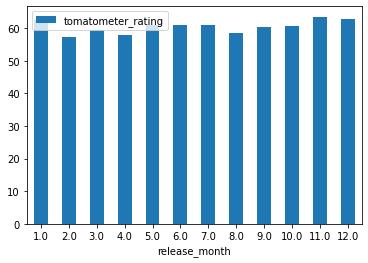

In [ ]:
dfmv_month_group = dfmv.groupby('release_month').aggregate({'tomatometer_rating':np.mean})
ax = dfmv_month_group.plot.bar(y = 'tomatometer_rating', rot=0)

Some explanation as to why November-December and June tend to fare better in tomatometer ratings:
- Blockbuster movies often release in the summer, such as Avengers and older Star Wars movies.
- Christmas is another time than yields popular movies.
- November-December is "Oscar season", during which award-seeking (hard-hitting, critically acclaimed) movies are released to stay relevant before the Academy Awards in February.

### Tomatometer by Year

Text(0, 0.5, 'tomatometer rating')

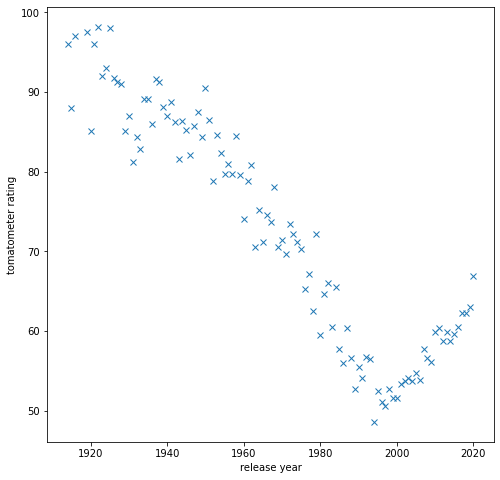

In [ ]:
dfmv_year_group = dfmv.groupby('release_year').aggregate({'tomatometer_rating':np.mean, 'release_year': np.mean})

# make time series plot for tomatometer rating
plt.figure(figsize = (8, 8))
plt.plot( dfmv_year_group['release_year'].values, dfmv_year_group['tomatometer_rating'].values, 'x')
plt.xlabel('release year')
plt.ylabel('tomatometer rating')

This highlights potential bias in the movies that we're analyzing. Older movies that are long out of the public consciousness are likely less represented in this dataset. The high, but decreasing critical acclaim up to the 1990s suggests that more critically acclaimed movies were remembered from earlier years, whereas we now have access to a wider range of well- or badly-received movies in the 21st century.

### Number of Movies by Year

Text(0, 0.5, 'number of movies')

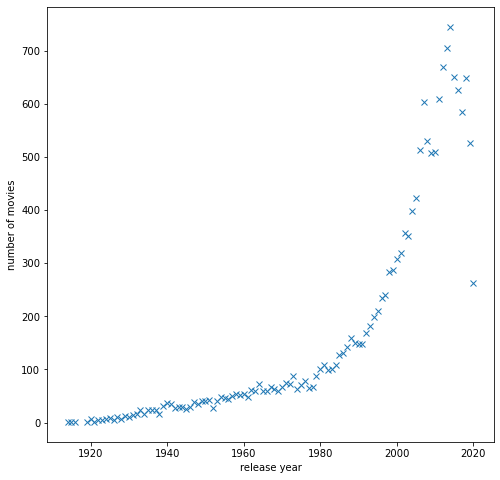

In [ ]:
movies_each_year = dfmv.groupby('release_year').count()
movies_each_year

# make time series plot for tomatometer rating
plt.figure(figsize = (8, 8))
plt.plot( movies_each_year.index.values, movies_each_year['rotten_tomatoes_link'].values, 'x')
plt.xlabel('release year')
plt.ylabel('number of movies')

To check the previous graph, we plotted the number of movies available from each year available on RT. This supported our idea that there was a much smaller focus on older movies, possibly acknolwedging only acclaimed ones from older years.

### Total Audience Count by Year

Text(0, 0.5, 'audience count')

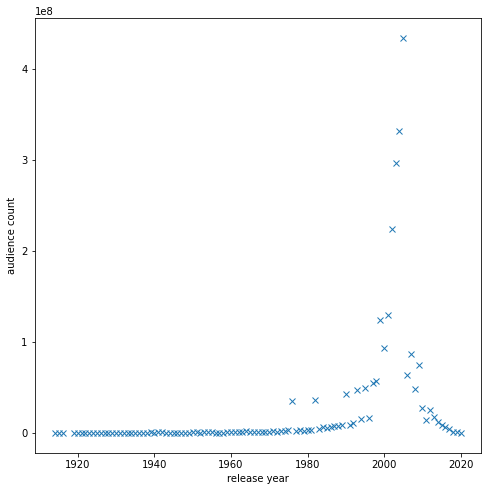

In [ ]:
aud_ct_each_year = dfmv.groupby('release_year').aggregate({'audience_count': np.sum})
aud_ct_each_year

# make time series plot for tomatometer rating
plt.figure(figsize = (8, 8))
plt.plot( aud_ct_each_year.index.values, aud_ct_each_year['audience_count'].values, 'x')
plt.xlabel('release year')
plt.ylabel('audience count')

We noticed that there is a strangely high amount of audience counts during the early years of 2000s. This could possibly be due to spammers, and the website was less secured in its early day.

### Total Audience Count by Year - Excluding Unusually High Audience Counts

Text(0, 0.5, 'audience count')

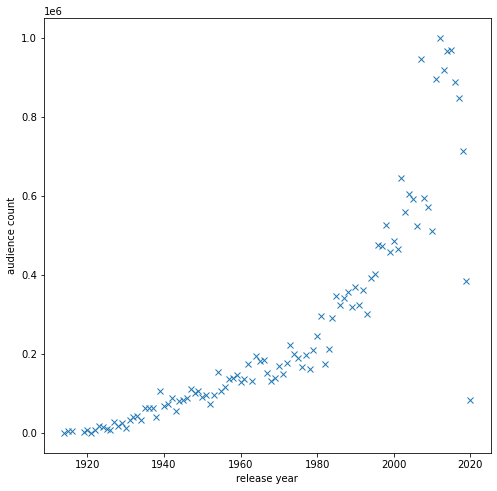

In [ ]:
aud_ct_each_year_clean = dfmv[dfmv['audience_count'] < 1*10**4].groupby('release_year').aggregate({'audience_count': np.sum})
aud_ct_each_year_clean

# make time series plot for tomatometer rating
plt.figure(figsize = (8, 8))
plt.plot( aud_ct_each_year_clean.index.values, aud_ct_each_year_clean['audience_count'].values, 'x')
plt.xlabel('release year')
plt.ylabel('audience count')

### Movies After 1998

In [ ]:
# Remove years before than 1998 to see the difference in EDA
dfmv_new = dfmv[(dfmv['release_year']>=1998)]
len(set(dfmv_new['main_actor']))
# dfmv_new[dfmv_new['release_year'].isna()]
# All entries

5747

### Tomatometer vs. Release Year (after 1998)

Text(0, 0.5, 'tomatometer rating')

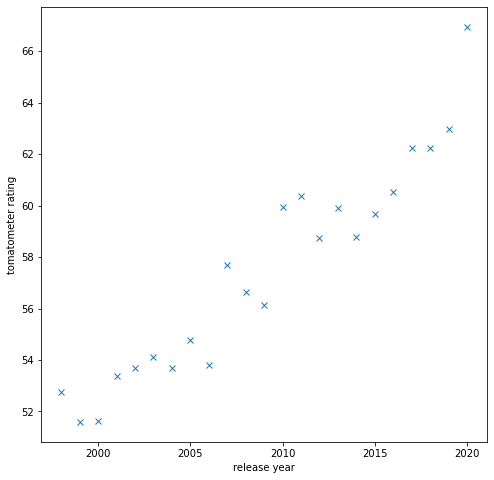

In [ ]:
dfmv_new_year_group = dfmv_new.groupby('release_year').aggregate({'tomatometer_rating':np.mean, 'release_year': np.mean})

# make time series plot for tomatometer rating
plt.figure(figsize = (8, 8))
plt.plot( dfmv_new_year_group['release_year'].values, dfmv_new_year_group['tomatometer_rating'].values, 'x')
plt.xlabel('release year')
plt.ylabel('tomatometer rating')

### Tomatometer by Month (after 1998)

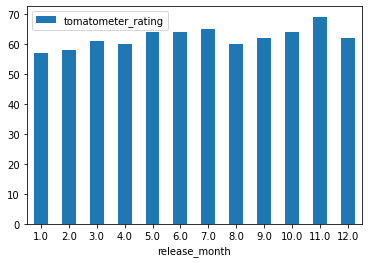

In [ ]:
dfmv_new_month_group = dfmv_new.groupby('release_month').aggregate({'tomatometer_rating':np.median})
ax = dfmv_new_month_group.plot.bar(y = 'tomatometer_rating', rot=0)

Some months seem to have higher ratings than others. What we can do is segment the months by seasons when we do predictions. Summer is a popular season to release blockbuster movies blockbusters, while late autumn/winteris "Oscar season", when studios release movies that they believe deserve awards.

In [ ]:
dfmv_new['original_release_date'].str.split('-', 1)

0        [2010, 02-12]
1        [2010, 04-30]
5        [2008, 03-07]
8        [2002, 09-27]
10       [2002, 01-19]
             ...      
17703    [2011, 07-08]
17704    [2001, 09-28]
17705    [2016, 02-12]
17706    [2006, 08-11]
17708    [2016, 03-04]
Name: original_release_date, Length: 11417, dtype: object

### Tomatometer vs. Audience - Years Before Rotten Tomatoes

In [ ]:
# narrow down to only movies released before 1998
dfmv_old = dfmv.loc[dfmv['release_year'] < 1998]

Text(0, 0.5, 'tomatometer rating')

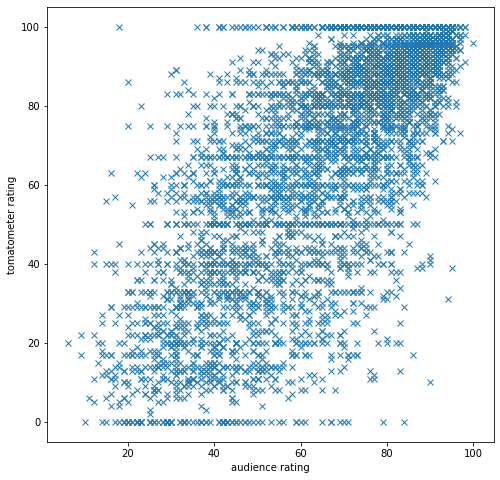

In [ ]:
plt.figure(figsize = (8, 8))
plt.plot( dfmv_old['audience_rating'].values, dfmv_old['tomatometer_rating'].values, 'x')
plt.xlabel('audience rating')
plt.ylabel('tomatometer rating')

Not much change here.

## Runtime
Checking if the length of a movie affects the critical reception

Text(0, 0.5, 'tomatometer rating')

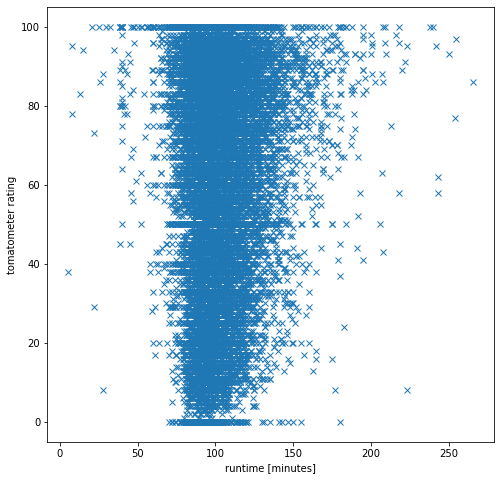

In [ ]:
plt.figure(figsize = (8, 8))
plt.plot( dfmv['runtime'].values, dfmv['tomatometer_rating'].values, 'x')
plt.xlabel('runtime [minutes]')
plt.ylabel('tomatometer rating')

This just shows us that most movies run between about 90 to 150 minutes. There are no indicators of a relationship between tomatometer ratings and runtime. 

## Content Rating - popular movies (high audience count)

<AxesSubplot:xlabel='audience_rating', ylabel='tomatometer_rating'>

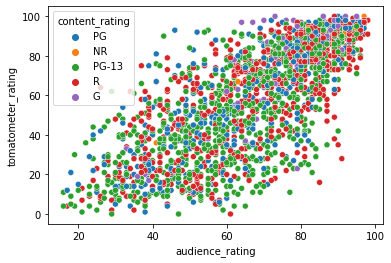

In [ ]:
plt.figure()
dfmv_limit = dfmv[dfmv['audience_count']>100000]
sns.scatterplot(data = dfmv_limit, x = 'audience_rating', y = 'tomatometer_rating', hue = 'content_rating')

There are not many obvious clusters for content rating.

We did notice very few "Not Rated" movies, suggesting that these popular movies mostly had wide theatrical releases that required a rating to be assigned to them.

In [ ]:
# Movie ratings in audience > 100,000 movies
dfmv_limit_rating = dfmv_limit.groupby('content_rating').aggregate({'tomatometer_rating':np.mean})
dfmv_limit_rating

,tomatometer_rating
content_rating,
G,72.281250
NR,78.636364
PG,57.338843
PG-13,50.475888
R,61.976845


In [ ]:
# Movie ratings in all movies
dfmv_rating = dfmv.groupby('content_rating').aggregate({'tomatometer_rating':np.mean})
dfmv_rating

,tomatometer_rating
content_rating,
G,69.446746
NC17,68.526316
NR,72.637599
PG,59.555196
PG-13,50.129325
R,55.354753


## Genres

In [ ]:
set(dfmv['genres'].str.split(',').apply(lambda  x : x[0] if type(x) == list else x))

{'Action & Adventure',
 'Animation',
 'Art House & International',
 'Classics',
 'Comedy',
 'Cult Movies',
 'Documentary',
 'Drama',
 'Horror',
 'Kids & Family',
 'Musical & Performing Arts',
 'Mystery & Suspense',
 'Romance',
 'Science Fiction & Fantasy',
 'Special Interest',
 'Television',
 'Western',
 nan}

The genres are listed alphabetically within each movie, not in order of relevance for each movie, so it would currently be difficult to use the genres as a predictor.

# Objective

## Inputs
Aspects of movies that could cause a movie to have a high Rotten Tomato rating:
* actors
    * main_actor
* directors (need to investigate more)
* original_release_date
    * release_month
* production_company
* movie_info - we could analyze key words that show popular interests
* genres? - currently listed alphabetically, not relevance to movie, but we could analyze similarities

Predicting rotten tomato rating based on historical data
* audience rating
* critic consensus (key words)
* tomatometer top critic count


## Output(s)
* tomatometer_rating is the primary output to predict

# Training

## Feature Engineering and Data Cleaning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
dfmv_original = pd.read_csv('rotten_tomatoes_movies.csv')

In [ ]:
dfmv = dfmv_original.copy()

### Date Cleaning

In [ ]:
dfmv['orig_release_datetime'] = pd.to_datetime(dfmv['original_release_date'])
dfmv['orig_release_year']=dfmv['orig_release_datetime'].dt.year
dfmv['orig_release_month'] = dfmv['orig_release_datetime'].dt.month
dfmv['orig_release_day'] = dfmv['orig_release_datetime'].dt.day
dfmv["orig_dayoftheweek"]=dfmv['orig_release_datetime'].dt.dayofweek
dfmv["orig_weekofyear"]=dfmv['orig_release_datetime'].dt.weekofyear
dfmv["orig_dayofyear"]=dfmv['orig_release_datetime'].dt.dayofyear

dfmv['stream_release_datetime'] = pd.to_datetime(dfmv['streaming_release_date'])
dfmv['stream_release_year']=dfmv['stream_release_datetime'].dt.year
dfmv['stream_release_month'] = dfmv['stream_release_datetime'].dt.month
dfmv['stream_release_day'] = dfmv['stream_release_datetime'].dt.day
dfmv["stream_dayoftheweek"]=dfmv['stream_release_datetime'].dt.dayofweek
dfmv["stream_weekofyear"]=dfmv['stream_release_datetime'].dt.weekofyear
dfmv["stream_dayofyear"]=dfmv['stream_release_datetime'].dt.dayofyear

<ipython-input-71-a2a2a0567bfb>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dfmv["orig_weekofyear"]=dfmv['orig_release_datetime'].dt.weekofyear
<ipython-input-71-a2a2a0567bfb>:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dfmv["stream_weekofyear"]=dfmv['stream_release_datetime'].dt.weekofyear


### Movie Seasons

* Spring Dump: January-February
* Spring Break: March-April
* Summer Blockbuster: May to July
* Autumn Dump: August-September
* Oscar Winter: October to end of December
* (based on: https://www.quora.com/What-are-considered-the-peak-seasons-for-movie-releases-in-theaters)

In [ ]:
season_range = {range(1, 3): 'Spring Dump', range(3, 5): 'Spring Break', range(5, 8): 'Summer Blockbuster', range(8, 10): 'Autumn Dump', range(10, 13): 'Oscar Winter'}
dfmv['orig_release_season'] = dfmv['orig_release_month'].apply(lambda x: next((v for k, v in season_range.items() if x in k), 0))

### Genre Cleaning

In [ ]:
dfmv['genres_list'] = dfmv[dfmv['genres'].notna()]['genres'].apply(lambda x: x.split(', '))
dfmv['genres_list']

0        [Action & Adventure, Comedy, Drama, Science Fi...
1                                                 [Comedy]
2                                        [Comedy, Romance]
3                                        [Classics, Drama]
4               [Action & Adventure, Drama, Kids & Family]
                               ...                        
17707                   [Drama, Musical & Performing Arts]
17708              [Action & Adventure, Animation, Comedy]
17709    [Action & Adventure, Art House & International...
17710                                    [Classics, Drama]
17711    [Action & Adventure, Art House & International...
Name: genres_list, Length: 17712, dtype: object

In [ ]:
BoolGenres = pd.get_dummies(dfmv['genres_list'].apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)
BoolGenres.columns

Index(['Action & Adventure', 'Animation', 'Art House & International',
       'Classics', 'Comedy', 'Cult Movies', 'Documentary', 'Drama', 'Horror',
       'Kids & Family', 'Musical & Performing Arts', 'Mystery & Suspense',
       'Romance', 'Science Fiction & Fantasy', 'Special Interest',
       'Television', 'Western', 'Anime & Manga', 'Faith & Spirituality',
       'Gay & Lesbian', 'Sports & Fitness'],
      dtype='object')

In [ ]:
dfmvBg = dfmv.join(pd.DataFrame(BoolGenres))
dfmvBg.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Television,Western,Anime & Manga,Faith & Spirituality,Gay & Lesbian,Sports & Fitness
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,0,0,1,0,0,0,0,0,0,0
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,0,0,0,0,0,0,0,0,0,0
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,0,1,0,0,0,0,0,0,0,0
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,0,0,0,0,0,0,0,0,0,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,0,0,0,0,0,0,0,0,0,0


### Actor Cleaning

Create a list of actors, then pull out only the main actors

In [ ]:
dfmvBg['actors_list'] = dfmvBg.actors.str[0:-1].str.split(',').tolist()
dfmvBg['main_actor'] = dfmvBg['actors_list'].apply(lambda x : x[0] if type(x) == list else x)

### Production Company Cleaning

Add new column for the abbreviated production company name

In [ ]:
dfmvBg['prod_comp_short'] = dfmv.production_company.str.replace(' ', '').str[0:4]

### Save Edited Data to CSV

Convert to a separate CSV file for ease of use

In [ ]:
dfmvBg.to_csv('rotten_tomato_clean_v2.csv')

## Machine Learning Model

The question we are trying to answer using the machine learning model is to analyze what aspects of a movie can cause it to have a high Rotten Tomato ratings, and whether we can predict a movie's rotten tomato rating given historical data. We attempted to answer the first question by performing exploratory data analysis, and we will will try to verify our analysis using machine learning models. We will attempt to answer the second question by using machine learning model, and we will use MSE and MAE to analyze the accuracy of the score. 

Based on the fact that the data is labeled and our target (tomat we are trying to predict a quantity amount (ratings), we will be using regression models to attempt to answer the question. 
The four models we will try is Linear Regression model, Random Forest model, Decision Tree model, and XGBoost model.

## Prepare Data

### Prepare data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Delete rows with empty values for original/streaming release, actors, production company

dfmv_prep = dfmvBg.dropna(subset = ['orig_release_datetime', 'stream_release_datetime', 'actors_list', 'prod_comp_short'])

In [ ]:
# display all nan values

with pd.option_context('display.max_rows', 62, 'display.max_columns', None): 
    display(dfmvBg.isna().sum())

In [ ]:
# continue removing nan (missing) values in genre, runtime, directors, tomatometer_rating

dfmv_prep = dfmv_prep.dropna(subset = ['genres', 'runtime', 'directors', 'tomatometer_rating'])

In [ ]:
dfmv_since1998 = dfmv_prep[dfmv_prep['orig_release_year']>=1998]

In [ ]:
X_cols = ['content_rating', 'directors', 'runtime', 'main_actor', 'prod_comp_short',
          'orig_release_year', 'orig_release_month', 'orig_release_day', 'orig_dayoftheweek', 'orig_weekofyear', 'orig_dayofyear', 'orig_release_season',
          'stream_release_year', 'stream_release_month', 'stream_release_day', 'stream_dayoftheweek', 'stream_weekofyear', 'stream_dayofyear',
          ]

genre_names = list(set(dfmv['genres'].str.cat(sep=', ').split(', ')))
X_cols.extend(genre_names)

X = dfmv_since1998[X_cols]
y = dfmv_since1998['tomatometer_rating']

#### Label Encoding Categorical Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

def lab_en(X_in):
    
    # Select non-numeric features within threshold
    cols_cat = [col for col in X_in.columns if X_in[col].dtype in ['object'] and X_in[col].nunique()<10000]
    print('Columns to encode:')
    print(cols_cat)
    
    label_encoder = LabelEncoder()
    
    X_out = X_in.copy()
    for col in cols_cat:
        X_out[col] = label_encoder.fit_transform(X_in[col])
    
    return X_out

In [ ]:
Xle = lab_en(X)

Columns to encode:
['content_rating', 'directors', 'main_actor', 'prod_comp_short', 'orig_release_season']


### Train, Test, and Split Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(Xle, y, test_size=0.2, random_state=1)

# y_train_ar = y_train.ravel()
# y_test_ar = y_test.ravel()

### Function for Model Prediction

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def get_mdl_mae_mse(X_trn, X_tst, y_trn, y_tst, mdl):
    mdl.fit(X_trn, y_trn)
    y_tst_prd = mdl.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    mse = mean_squared_error(y_tst, y_tst_prd)
    return (mae, mse)

### Functions for Model Evaluation

#### Optimal Number of Features and Cross-Validation Score

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

def opt_num_feat_crossval(X_trn, X_tst, y_trn, y_tst, mdl):
    
    min_features_to_select = 1  # Minimum number of features to consider
    rfecv = RFECV(estimator=mdl, step=1, cv=5,
                  scoring='neg_mean_absolute_error',
                  min_features_to_select = min_features_to_select)
    rfecv.fit(X_trn, y_trn)
    
    print("Optimal number of features : %d" % rfecv.n_features_)
    
    # def plt_feat_vs_crossval(rfecv):
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(min_features_to_select,
                   len(rfecv.grid_scores_) + min_features_to_select),
                       rfecv.grid_scores_)
    plt.show()
    
    print(np.where(rfecv.support_ == False)[0])
    
    return rfecv

#### Feature Importance

In [ ]:
from sklearn.model_selection import GridSearchCV

def feat_impor(X_trn, X_tst, y_trn, y_tst, mdl):
    
    mdl.fit(X_trn, y_trn)
    
    plt.figure(figsize=(10,10))
    plt.barh(X_trn.columns, mdl.feature_importances_)

#### Compare Actual and Predicted Values (Absolute Percent Error)

In [ ]:
def comparison(X_trn, X_tst, y_trn, y_tst, mdl):
    
    fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 20))
    ax[0].plot(np.arange(X_tst.shape[0]), y_tst)
    ax[0].plot(np.arange(X_tst.shape[0]), mdl.predict(X_tst))
    ax[0].set_xlabel('movie')
    ax[0].set_ylabel('tomatometer_rating')
    ax[0].legend(['actual', 'prediction'])

    ax[1].plot(np.arange(X_tst.shape[0]), np.abs(mdl.predict(X_tst) - y_tst)/y_tst * 100)
    ax[1].set_ylabel('Abs Percent error (%)')

## Random Forest Model, All Movies Since 1998 (RFS)

First we will test the case where we include all movies over 1998 regardless of popularity rating or number of top critics reviewed.

### Function and Prediction

Test the Random Forest Regressor with different max. number of leaf nodes

In [ ]:
from sklearn.ensemble import RandomForestRegressor

for i in [2,3,5,50,150,200,250,300,500]:
    mdlRfsMv_i = RandomForestRegressor(random_state=1, max_leaf_nodes=i)
    rfs_mae, rfs_mse = get_mdl_mae_mse(X_train, X_test, y_train, y_test, mdlRfsMv_i)
    print('Max leaf nodes: ', i, '\t MAE: ', rfs_mae, '\t MSE: ', rfs_mse)

Max leaf nodes:  2 	 MAE:  22.087796356466168 	 MSE:  692.6023885869167
Max leaf nodes:  3 	 MAE:  21.43216554466559 	 MSE:  658.4453177848183
Max leaf nodes:  5 	 MAE:  20.626012599208913 	 MSE:  616.9543286227774
Max leaf nodes:  50 	 MAE:  19.756005411862997 	 MSE:  575.266265300773
Max leaf nodes:  150 	 MAE:  19.639352671897733 	 MSE:  570.4025121374192
Max leaf nodes:  200 	 MAE:  19.616425507711433 	 MSE:  570.5729360602596
Max leaf nodes:  250 	 MAE:  19.599029462150842 	 MSE:  570.2185709887203
Max leaf nodes:  300 	 MAE:  19.58457191555093 	 MSE:  570.0409174669666
Max leaf nodes:  500 	 MAE:  19.536928889465997 	 MSE:  568.7855440020169


In [ ]:
RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [ ]:
rfs_rmse = np.sqrt(rfs_mse)
print('RMSE:', rfs_rmse)

RMSE: 23.849225228548136


### Select Model from Test with Lowest MAE

In [ ]:
mdlRfsMv = RandomForestRegressor(random_state=1, max_leaf_nodes=500, n_estimators=100)

### RFS - Optimal Number of Features

Optimal number of features : 37


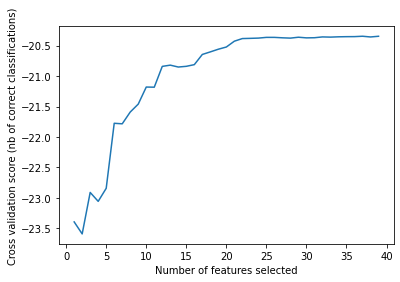

[34 38]


In [ ]:
%%time

Rfs_rfecv = opt_num_feat_crossval( X_train, X_test, y_train, y_test,
                                           mdlRfsMv )

### RFS - Feature Importance

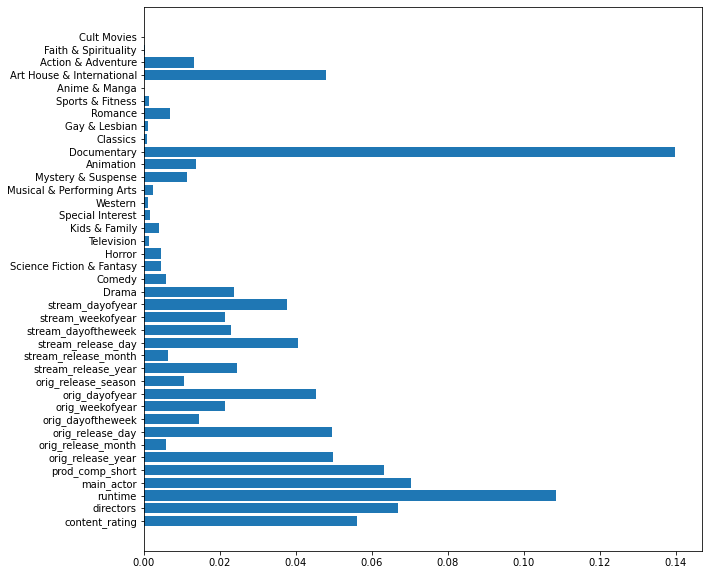

In [ ]:
feat_impor( X_train, X_test, y_train, y_test,
            mdlRfsMv )

The Documentary genre seems to indicate high Tomatometer scores. The Ryerson team noted that documentaries, especially related to crime, are becoming more popular in media. Additionally, popular documentaries cover personal issues and receive acclaim for their social relevance, and this could contribute to the high effect documentary movies have on movie ratings. Additionally, other features that seemingly affect ratings is runtime, directors, content rating, main actors, and production companies. 

### RFS - Comparisons and Error

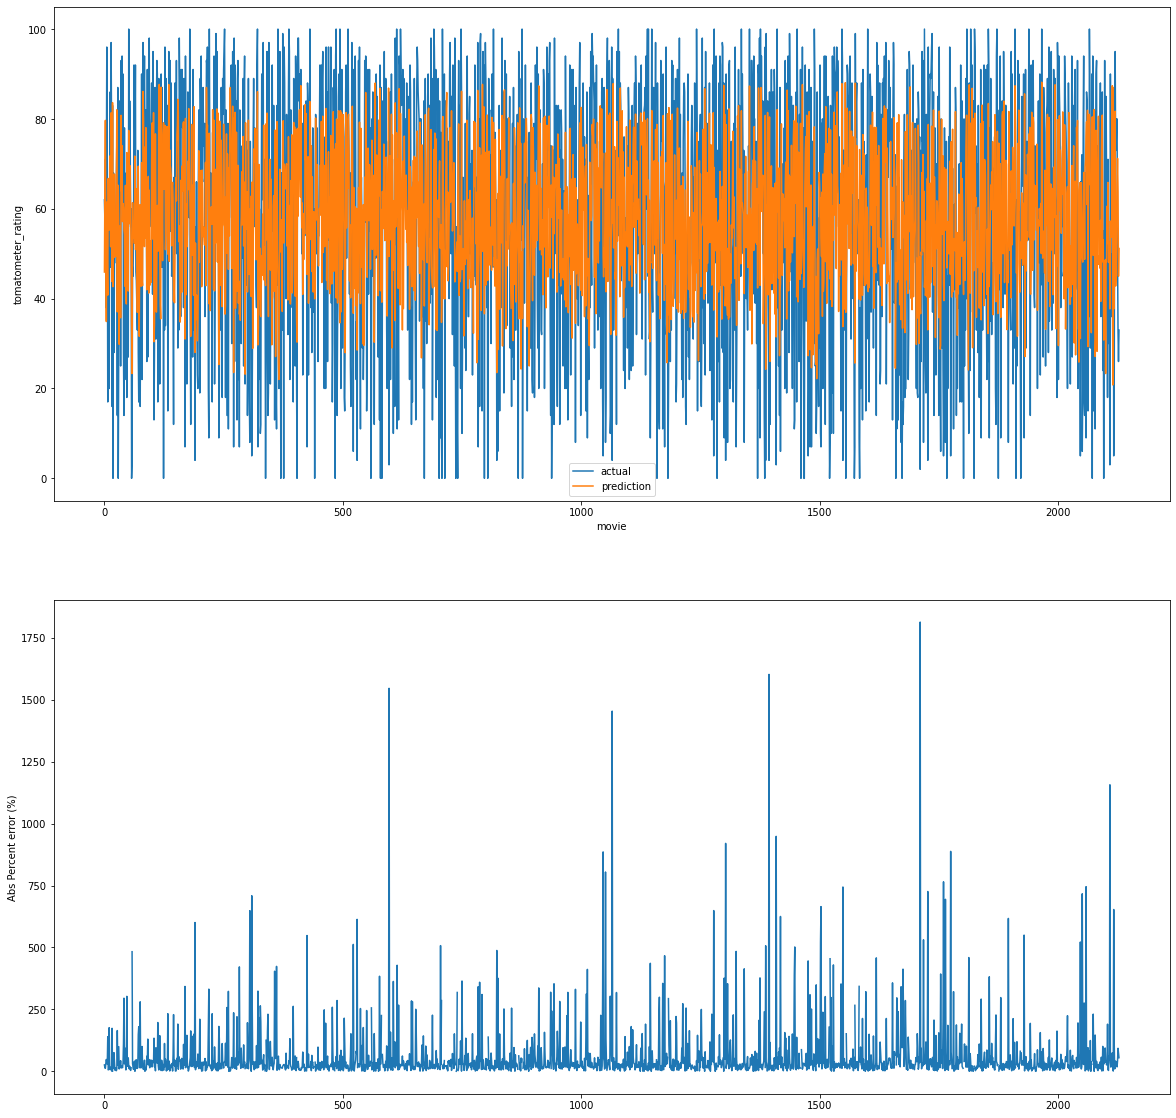

In [ ]:
comparison( X_train, X_test, y_train, y_test,
            mdlRfsMv )

We noticed significant noise in this random forest prediction. This might be due movies with small critic samples that skew the general trends of high Tomatometer ratings, because one good or one bad rating can skew these scores more significantly. Therefore, we will try running the model again, but this time we will run it with criteria of tomatometer count greater than 80 and tomatometer top critic count of greater than 5. This means that movies will only be limited to movies that qualify as widely released movies with more high quality ratings.


## Random Forest, 1998-onward Movies Elligible for Certified Fresh ("RFS CE")
To optimize time performance, we used Rotten Tomatoes' criteria for movies that are eligible to be Certified Fresh.
For a FRESH movie to be Certified Fresh movies, it needs least 80 critic reviews (for a wide-release movie) of which at least 5 are from Top Critics.

Note that a Certified Fresh movie is also consistently above 75% on the Tomatometer. Our criteria only uses the critic number requirements to include Rotten movies.

We used this criteria to select movies that we believe to have reputable reviews.

In [ ]:
# slightly modified criteria
dfmv_since1998_CE = dfmv_since1998[(dfmv_since1998['tomatometer_count']>=80)
                       & (dfmv_since1998['tomatometer_top_critics_count']>=5)]

In [ ]:
X_CE = dfmv_since1998_CE[X_cols]
y_CE = dfmv_since1998_CE['tomatometer_rating']

In [ ]:
Xle_CE = lab_en(X_CE)

Columns to encode:
['content_rating', 'directors', 'main_actor', 'prod_comp_short', 'orig_release_season']


### Train, Test, and Split Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test
X_train_CE, X_test_CE, y_train_CE, y_test_CE = train_test_split(Xle_CE, y_CE, test_size=0.2, random_state=1)

In [ ]:
mdlRfsMv_i.fit(X_train_CE, y_train_CE)
y_test_pred_CE = mdlRfsMv_i.predict(X_test_CE)

### Model and Evaluation for Certified-Elligible Movies after 1998

In [ ]:
from sklearn.ensemble import RandomForestRegressor

for i in [2,3,5,50,150,200,250,300,500]:
    mdlRfsMv_i = RandomForestRegressor(random_state=1, max_leaf_nodes=i)
    rfs_mae_CE, rfs_mse_CE = get_mdl_mae_mse(X_train_CE, X_test_CE, y_train_CE, y_test_CE, mdlRfsMv_i)
    print('Max leaf nodes: ', i, '\t MAE: ', rfs_mae_CE, '\t MSE: ', rfs_mse_CE)

Max leaf nodes:  2 	 MAE:  21.96386580784132 	 MSE:  644.9391915942612
Max leaf nodes:  3 	 MAE:  21.380637733131174 	 MSE:  620.8530248174817
Max leaf nodes:  5 	 MAE:  20.831436080959083 	 MSE:  597.1397907600666
Max leaf nodes:  50 	 MAE:  19.036497711873675 	 MSE:  513.3920636228921
Max leaf nodes:  150 	 MAE:  18.951022456591787 	 MSE:  508.9435990079066
Max leaf nodes:  200 	 MAE:  18.96648826491166 	 MSE:  509.99743827567244
Max leaf nodes:  250 	 MAE:  19.023473522572804 	 MSE:  512.286943025324
Max leaf nodes:  300 	 MAE:  19.085353457343558 	 MSE:  514.818960409531
Max leaf nodes:  500 	 MAE:  19.166669636784878 	 MSE:  517.2688966256378


In [ ]:
rfs_rmse_CE = np.sqrt(rfs_mse_CE)
print('RMSE:', rfs_rmse_CE)

RMSE: 22.74354626318503


### Select Best Model from Test

In [ ]:
mdlRfsMv_CE = RandomForestRegressor(n_estimators=100, max_leaf_nodes=150, random_state=1)

### RFS CE - Optimal Number of Features 

Optimal number of features : 39


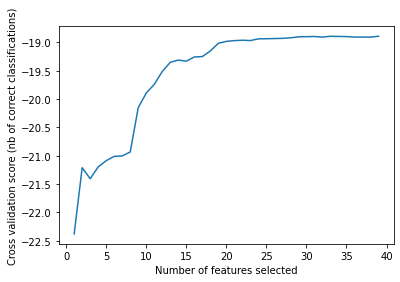

[]


In [ ]:
Rfs_rfecv_CE = opt_num_feat_crossval( X_train_CE, X_test_CE, y_train_CE, y_test_CE,
                                           mdlRfsMv_CE )

### RFS CE - Feature Importance 

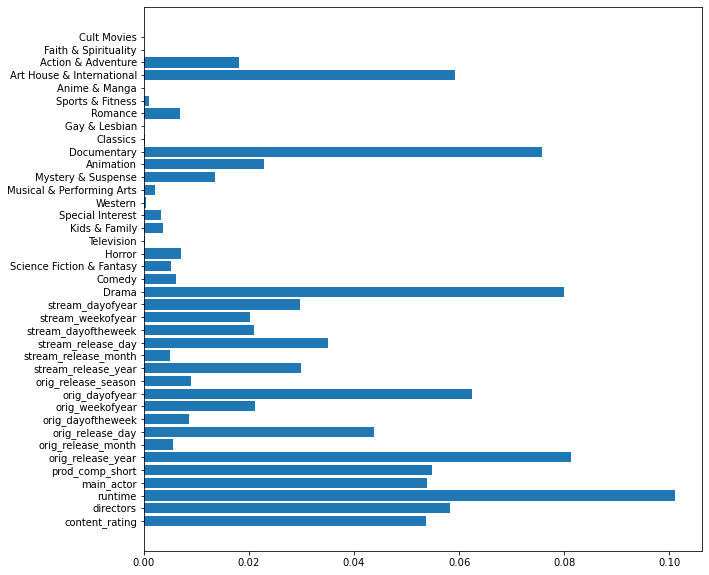

In [ ]:
feat_impor( X_train_CE, X_test_CE, y_train_CE, y_test_CE,
            mdlRfsMv_CE )

This time original release year, runtime, documentary, drama, and art house and international, production company, main actor, directors, and original release day of year has the largest impact on the movie ratings. These features are a bit peculiar because we did not expect original release day of year to have an effect on the tomatometer rating. 

The Documentary genre seems to indicate high Tomatometer scores. The Ryerson team noted that documentaries, especially related to crime, are becoming more popular in media. Additionally, popular documentaries cover personal issues and receive acclaim for their social relevance, and this could contribute to the high effect documentary movies have on movie ratings. Additionally, other features that seemingly affect ratings is runtime, directors, content rating, main actors, and production companies. 

### RFS CE - Comparisons and Error

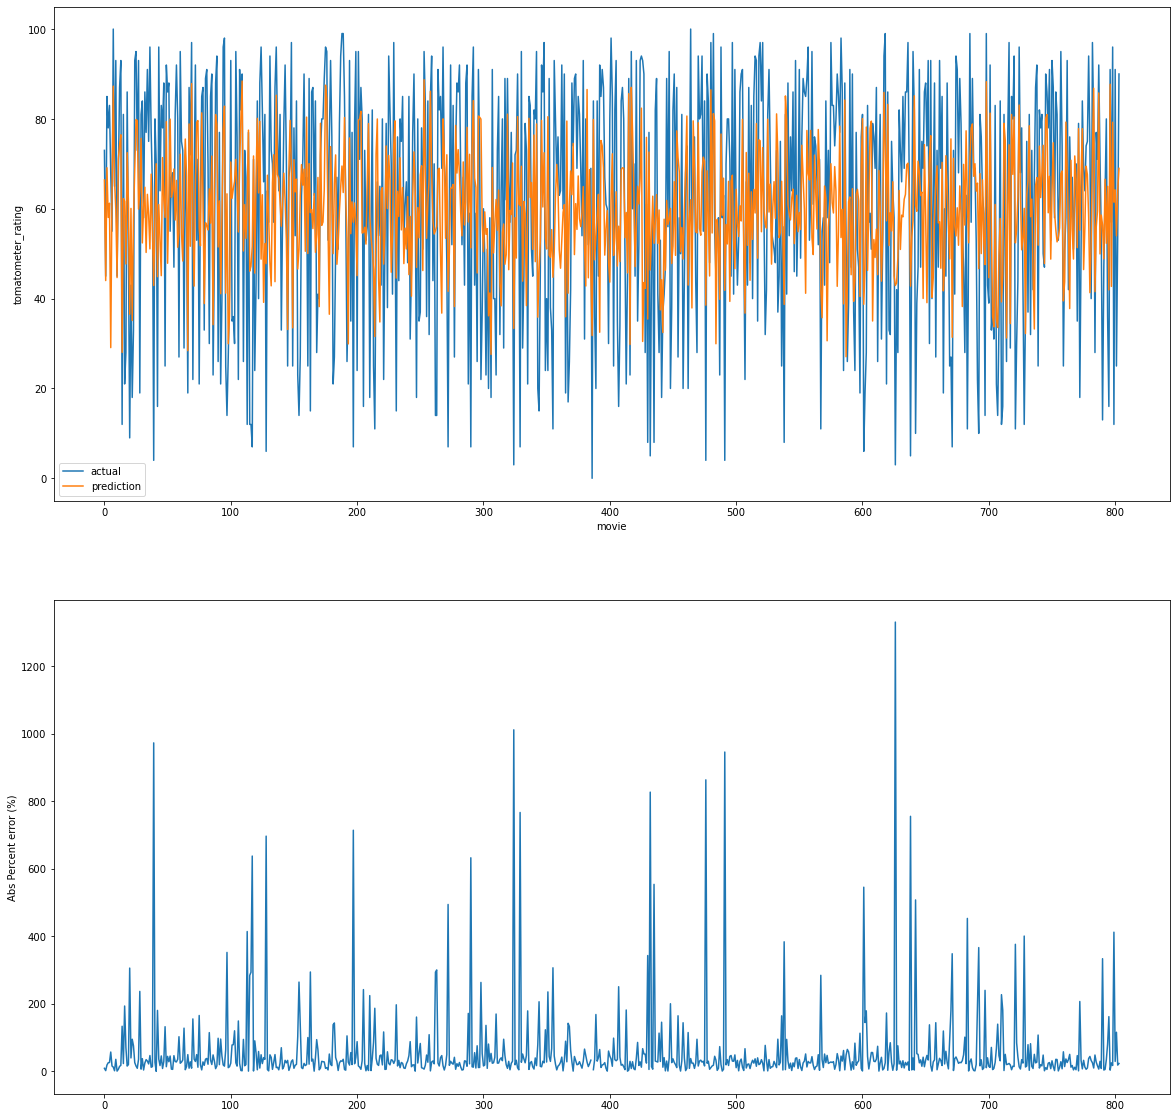

In [ ]:
comparison( X_train_CE, X_test_CE, y_train_CE, y_test_CE,
            mdlRfsMv_CE )

Overall, random forest regression seems to underestimate more frequently than it overestimates when making predictions compared to the actual values. We also noticed that there are a lot of large spikes in the absolute percent error that could negatively affect our MSE scores.

## Linear Regression Model, All Movies Since 1998 ("LIN")

In [ ]:
from sklearn.linear_model import LinearRegression

mdlLinMv = LinearRegression()

lin_mae, lin_mse = get_mdl_mae_mse(X_train, X_test, y_train, y_test, mdlLinMv)
print('MAE: ', lin_mae, '\t MSE: ', lin_mse)

MAE:  20.334369639288163 	 MSE:  603.7317098373626


### LIN - Optimal Number of Features 

Optimal number of features : 33


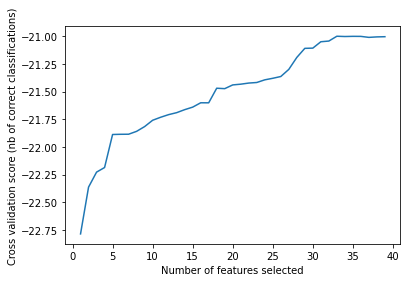

[ 1  3  4  9 16 20]


In [ ]:
%%time

Lin_rfecv = opt_num_feat_crossval( X_train, X_test, y_train, y_test,
                                   mdlLinMv )

### LIN - Comparisons and Error

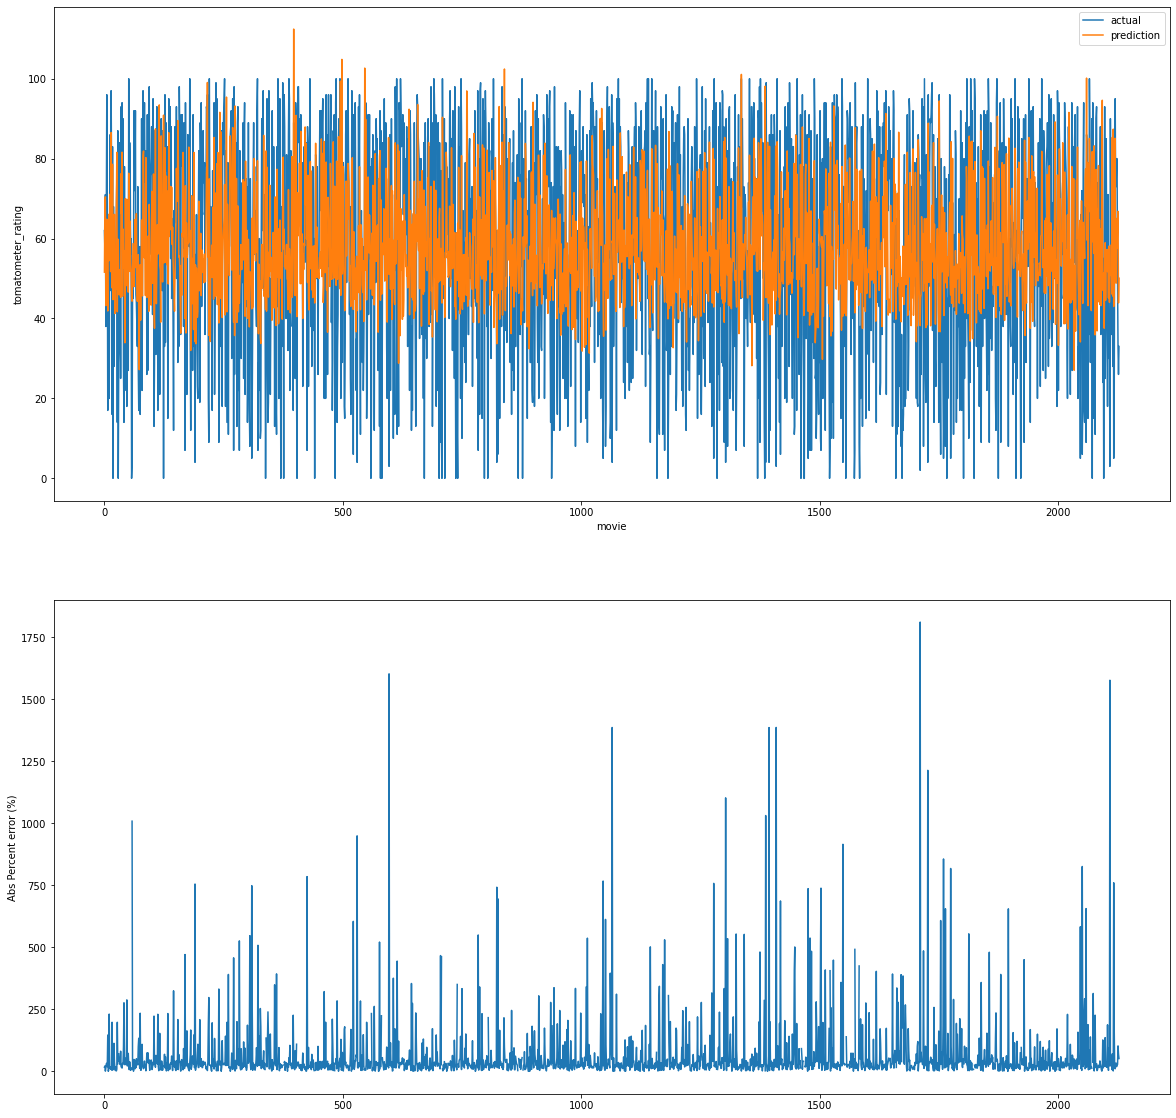

In [ ]:
# Linear Regression: prediction vs. actual 
comparison( X_train, X_test, y_train, y_test,
            mdlLinMv )

In [ ]:
## Fine tuning the linear regression model
mdlLinMv3 = LinearRegression(normalize = True)

mdlLinMv3.fit(X_train, y_train)
result3 = mdlLinMv3.predict(X_test)

### LIN - Feature Importance

<BarContainer object of 39 artists>

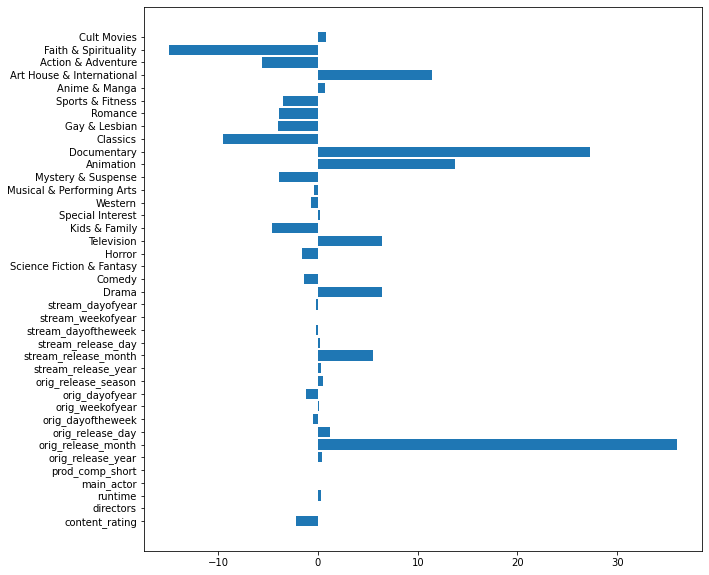

In [ ]:
# Linear Regression Feature Analysis

plt.figure(figsize=(10,10))
plt.barh(X_test.columns, mdlLinMv3.coef_)

Based on the figure, original release month and documentary have the highest coefficients, and faith & spirituality has the lowest coefficient. This implies to us that the documentary genre movies typically have high tomatometer ratings and faith & spirituality genre movies typically have low tomatometer ratings.

In [ ]:
from sklearn.model_selection import cross_val_score

mdlLinMv4 = LinearRegression(normalize=True)

mdlLinMv4.fit(X_train, y_train)
result4 = mdlLinMv4.predict(X_test)
print(cross_val_score(mdlLinMv4, X_test, y_test, scoring='neg_mean_absolute_error').mean())

-20.602310209638265


In [ ]:
Xcol_LR = list(X_test.columns)
Xcoef_LR = mdlLinMv4.coef_

coef_col = [ [Xcol_LR[i], Xcoef_LR[i]] for i in range(len(Xcol_LR)) ]
coef_col.sort(key=lambda x: abs(x[1]), reverse=True)
# print('Features from greatest to least influence:')

important_lin_features = [i[0] for i in coef_col]
important_lin_features

['orig_release_month',
 'Documentary',
 'Faith & Spirituality',
 'Animation',
 'Art House & International',
 'Classics',
 'Drama',
 'Television',
 'Action & Adventure',
 'stream_release_month',
 'Kids & Family',
 'Gay & Lesbian',
 'Mystery & Suspense',
 'Romance',
 'Sports & Fitness',
 'content_rating',
 'Horror',
 'Comedy',
 'orig_dayofyear',
 'orig_release_day',
 'Cult Movies',
 'Western',
 'Anime & Manga',
 'orig_dayoftheweek',
 'orig_release_season',
 'orig_release_year',
 'Musical & Performing Arts',
 'stream_release_year',
 'runtime',
 'stream_release_day',
 'stream_dayoftheweek',
 'stream_dayofyear',
 'Special Interest',
 'orig_weekofyear',
 'stream_weekofyear',
 'Science Fiction & Fantasy',
 'directors',
 'main_actor',
 'prod_comp_short']

### LIN - R^2 Score

In [ ]:
from sklearn.metrics import r2_score

def get_r2_score(y_tst, y_tst_prd):
    r2 = r2_score(y_tst, y_tst_prd)
    return(r2)

In [ ]:
r2_score(y_test, result4)

0.21198079752997623

The R^2 score of 0.2 suggests us that the features are not explaining much in the variation of tomatometer rating regardless of the variable significance.

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, result4)

20.334369639288195

The MAE value of the Linear Regression model is higher than the mae values of the Decision Tree Regression model, Random Forest Regression model, and XGBoost Regression model.

In [ ]:
from sklearn.linear_model import LinearRegression

mdlLinMv = LinearRegression()

lin_mae, lin_mse = get_mdl_mae_mse(X_train, X_test, y_train, y_test, mdlLinMv4)
print('MAE: ', lin_mae, '\t MSE: ', lin_mse)

MAE:  20.334369639288195 	 MSE:  603.7317098373644


### LIN Optimized - Error Analysis

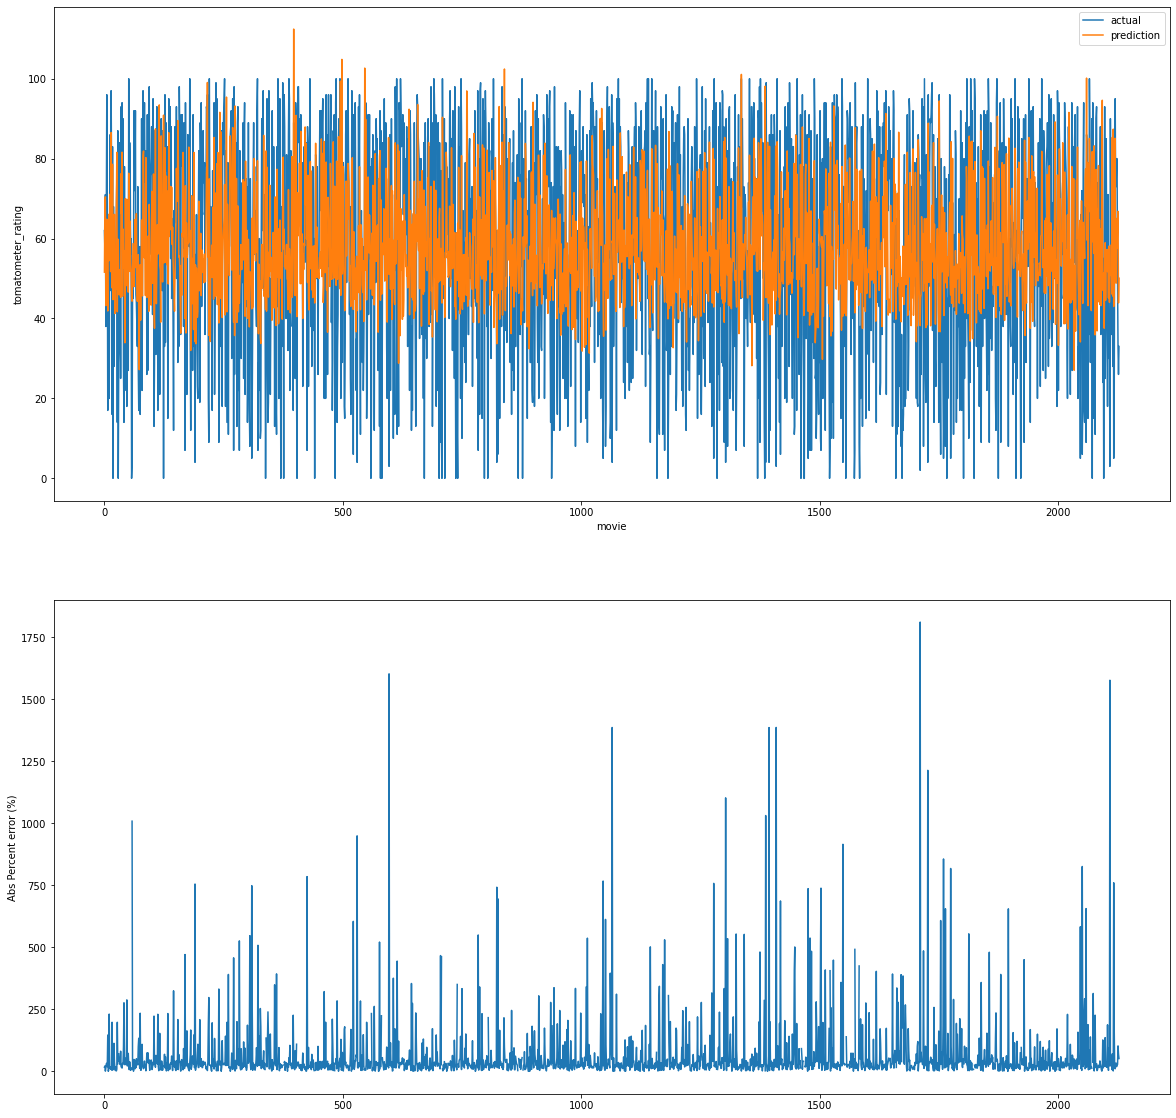

In [ ]:
comparison( X_train, X_test, y_train, y_test,
            mdlLinMv4 )

Overall, the Linear Regression model seems to underestimate more frequently than it overestimates when making predictions compared to the actual values. However, we noticed that the Linear Regression model sometimes predicts the tomatometer rating higher than 100. This suggests that the Linear Regression model is poor at predicitng an accurate tomatometer rating. We did not run the Linear Regression model for all movies after 1998 with certified fresh rating because we did not see significant difference when comparing the XGBoost Regression model for all movies after 1998 and all movies after 1998 with certified fresh rating. Another reason is that the Linear Regression model does not require high computing power, so we can use all movies after 1998 instead of only certified fresh movies after 1998.

## Decision Tree Regression, All Movies after 1998 ('DTR')

### Test DTR with different number of max leaf nodes

In [ ]:
from sklearn.tree import DecisionTreeRegressor

for i in [2,3,5,50,150,200,250,300,500,1000,3000]:
    mdlDtrMv = DecisionTreeRegressor(max_leaf_nodes=i,random_state=1)
    dtr_mae, dtr_mse = get_mdl_mae_mse(X_train, X_test, y_train, y_test, mdlDtrMv)
    print('Max leaf nodes: ', i, '\t MAE: ', dtr_mae, '\t MSE:', dtr_mse)

Max leaf nodes:  2 	 MAE:  22.0875293310322 	 MSE: 692.5701825935621
Max leaf nodes:  3 	 MAE:  21.494166640860733 	 MSE: 665.7511350705556
Max leaf nodes:  5 	 MAE:  20.726329320510985 	 MSE: 626.2899843630529
Max leaf nodes:  50 	 MAE:  20.04225805683604 	 MSE: 604.6387519513611
Max leaf nodes:  150 	 MAE:  20.387527301398286 	 MSE: 643.7925687603255
Max leaf nodes:  200 	 MAE:  20.556099074113302 	 MSE: 657.4762167751419
Max leaf nodes:  250 	 MAE:  20.816110845327124 	 MSE: 680.2785674000389
Max leaf nodes:  300 	 MAE:  21.113827787012653 	 MSE: 704.5452973229783
Max leaf nodes:  500 	 MAE:  21.844576899079655 	 MSE: 773.0340627973386
Max leaf nodes:  1000 	 MAE:  23.704014900712718 	 MSE: 922.5652009612108
Max leaf nodes:  3000 	 MAE:  26.22741997580908 	 MSE: 1106.6061550138493


### DTR - Optimal Number of Features

Optimal number of features : 22


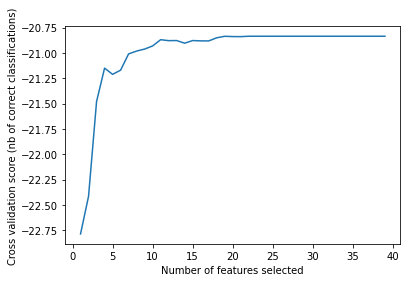

[ 3  6 13 16 19 20 22 23 24 25 26 30 31 33 34 37 38]


In [ ]:
from sklearn.tree import DecisionTreeRegressor

mdlDtrMv = DecisionTreeRegressor(max_leaf_nodes=50, random_state=1)
rfecv_Dtr = opt_num_feat_crossval( X_train, X_test, y_train, y_test,
                                           mdlDtrMv )

### DTR - Feature Importance

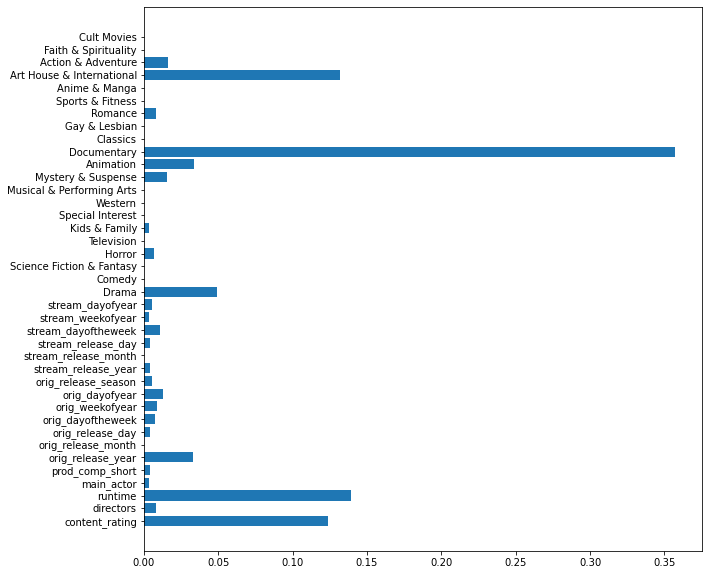

In [ ]:
%%time

feat_impor( X_train, X_test, y_train, y_test,
            mdlDtrMv )

Based on the figure, the features that are most important in our Decision Tree Regression model are genres (Documentary, Art House & International) runtime, and content rating.

### DTR - Comparisons and Error

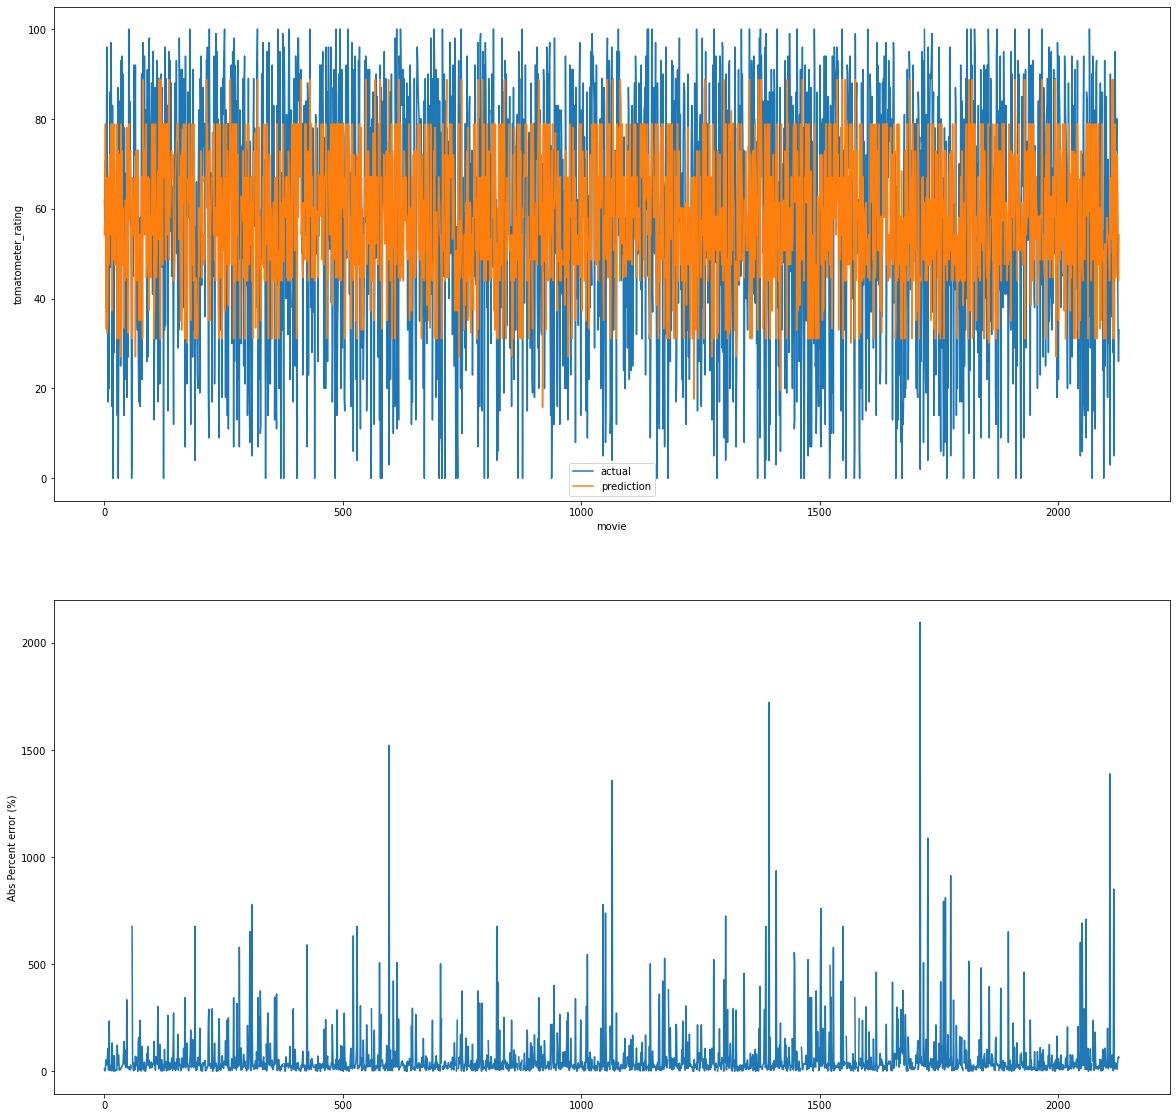

In [ ]:
comparison( X_train, X_test, y_train, y_test,
            mdlDtrMv )

Overall, the Decision Tree Regression model seems to underestimate more frequently than it overestimates when making predictions compared to the actual values. The high spikes in the absolute percent error could lead to high MSE and MAE values.

## XGBoost, Certified-Eligible Movies after 1998 ("XGB CE")

We switched back to certified eligible movies after 1998 for our XGBoost test because the performance for XGBoost including all movies is too computationally expensive for our computers to handle.

### Test XGB CE with different max depths 

In [ ]:
from xgboost import XGBRegressor

for i in range(10):
    mdlXgbMv_i_CE = XGBRegressor(random_state=1, max_depth=i)
    rfs_mae_CE, rfs_mse_CE = get_mdl_mae_mse(X_train_CE, X_test_CE, y_train_CE, y_test_CE, mdlXgbMv_i_CE)
    print('Max depth: ', i, '\t MAE: ', rfs_mae_CE, '\t MSE: ', rfs_mse_CE)

Max depth:  0 	 MAE:  22.663424714880797 	 MSE:  686.803645235042
Max depth:  1 	 MAE:  19.310572334782993 	 MSE:  519.1272287642098
Max depth:  2 	 MAE:  18.765653849834234 	 MSE:  495.3748628460709
Max depth:  3 	 MAE:  18.8585704321885 	 MSE:  506.47482377108184
Max depth:  4 	 MAE:  18.90202032511507 	 MSE:  517.934848719043
Max depth:  5 	 MAE:  19.08943066905387 	 MSE:  528.8455593469525
Max depth:  6 	 MAE:  19.45976670434819 	 MSE:  549.526896750794
Max depth:  7 	 MAE:  19.171881411910352 	 MSE:  551.5011388581221
Max depth:  8 	 MAE:  19.204236015158507 	 MSE:  547.3401235873484
Max depth:  9 	 MAE:  19.59988352493267 	 MSE:  561.0523537842141


### Select max. depth for XGB CE prediction with lowest MAE

In [ ]:
mdlXgbMv_CE = XGBRegressor(random_state=1, max_depth=2, n_estimators=100)

In [ ]:
xgb_mae_CE, xgb_mse_CE = get_mdl_mae_mse(X_train_CE, X_test_CE, y_train_CE, y_test_CE, mdlXgbMv_CE)
xgb_rmse_CE = np.sqrt(xgb_mse_CE)
print('Max depth: ', i, '\t MAE: ', xgb_mae_CE, '\t MSE: ', xgb_mse_CE, '\t', 'RMSE:', xgb_rmse_CE)

Max depth:  9 	 MAE:  18.765653849834234 	 MSE:  495.3748628460709 	 RMSE: 22.25701828291631


We noticed that the MSE and MAE are the lowest for XGBoost.

### XGB CE - Optimal Number of Features

Optimal number of features : 17


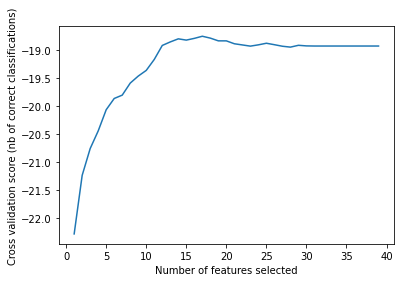

[ 1  3  6  7  8  9 11 13 14 15 16 17 20 22 25 26 30 31 33 34 37 38]


In [ ]:
%%time

Xgb_rfecv_CE = opt_num_feat_crossval( X_train_CE, X_test_CE, y_train_CE, y_test_CE,
                                           mdlXgbMv_CE )

### XGB CE - Features Importance

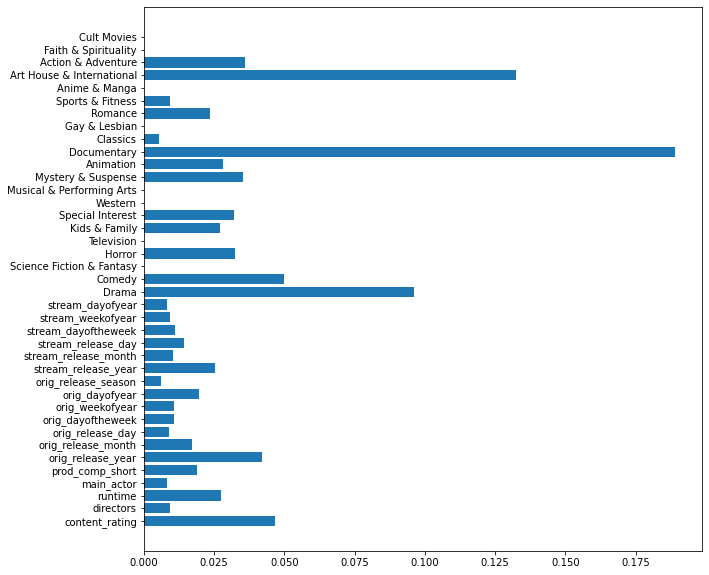

In [ ]:
feat_impor( X_train_CE, X_test_CE, y_train_CE, y_test_CE,
            mdlXgbMv_CE )

The XGBoost recursive feature selection graph suggests that the Documentary, Art House & International, Drama, Animation genres have the most positive effects on the XGBoost regression.

### XGB CE - Comparisons and Error

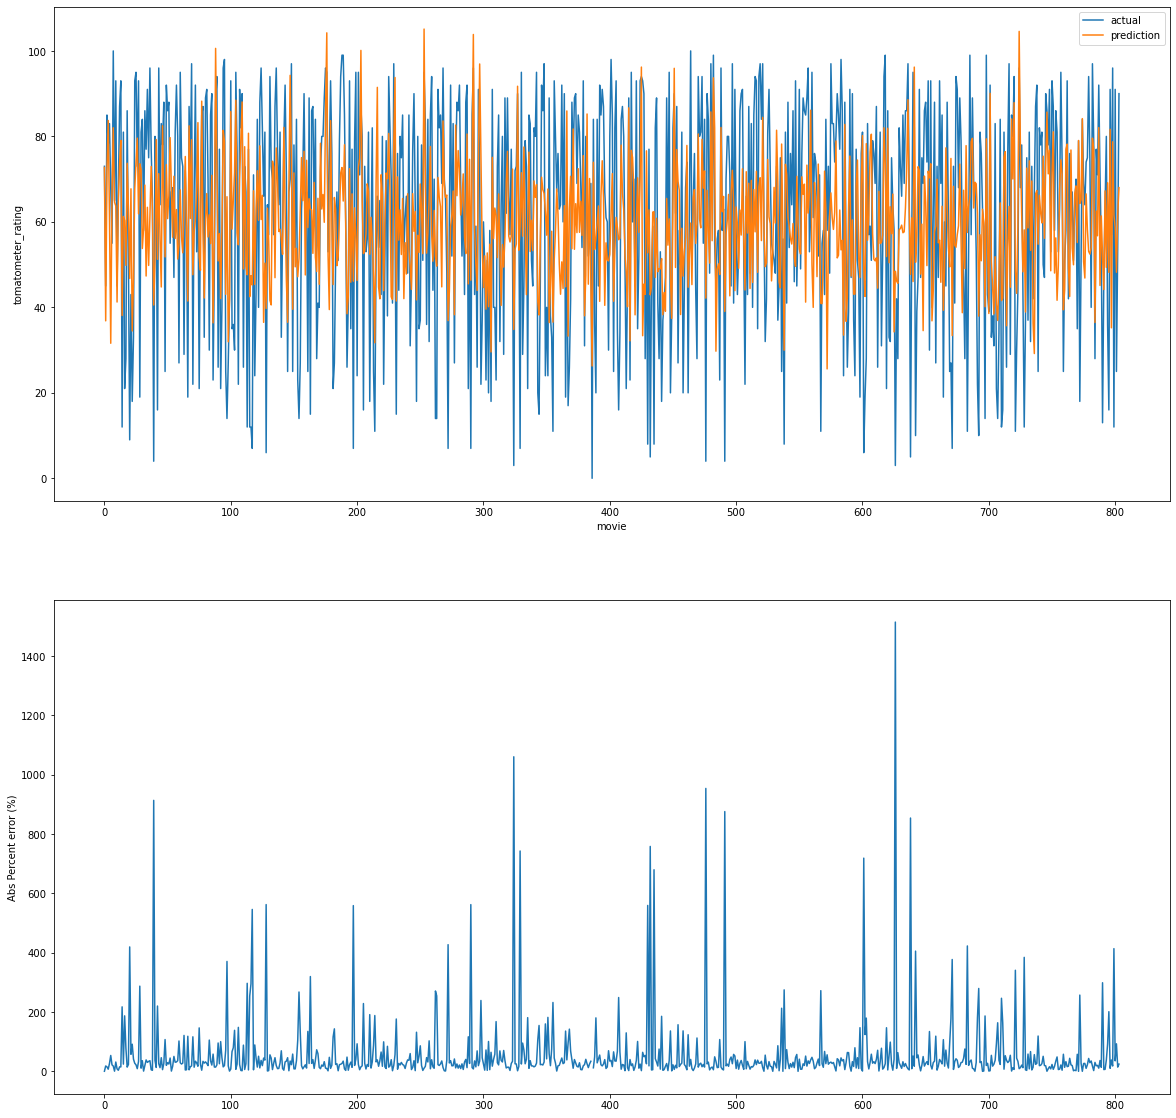

In [ ]:
comparison( X_train_CE, X_test_CE, y_train_CE, y_test_CE,
            mdlXgbMv_CE )

We also noticed that the graphs seem to be a better fit for the XGBoost, and there are less large jumps in the absolute percent error of the graph.

## Top 10 Highest Rated Movies

We examined the highest rated movies to see which features were common among them. This helped us evaluate the strengths of each model, and it also gave us a reality check for the movies

### All Movies after 1998

In [ ]:
dfmv_since1998.sort_values(by='tomatometer_rating', ascending=False).head(10)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,Special Interest,Television,Western,Anime & Manga,Faith & Spirituality,Gay & Lesbian,Sports & Fitness,actors_list,main_actor,prod_comp_short
5403,m/der_kreis,The Circle,"In 1950s Zurich, a shy teacher (Matthias Hunge...",NaN,NR,Drama,Stefan Haupt,NaN,"Babett Arens, Aaron Hitz, Martin Hug, Matthias...",2014-11-14,...,0,0,0,0,0,0,0,"[Babett Arens, Aaron Hitz, Martin Hug, Matt...",Babett Arens,Wolf
9757,m/louder_than_a_bomb_2010,Louder Than A Bomb,Four high-school teams from Chicago prepare fo...,NaN,NR,"Documentary, Special Interest","Greg Jacobs, Jon Siskel",NaN,"Cristin O'Keefe Aptowicz, Hannah Bernard, Gabr...",2011-05-18,...,1,0,0,0,0,0,0,"[Cristin O'Keefe Aptowicz, Hannah Bernard, G...",Cristin O'Keefe Aptowicz,Balc
7845,m/hondros,Hondros,The stories behind war photographer Christophe...,NaN,NR,Documentary,Greg Campbell,Greg Campbell,Chris Hondros,2018-03-02,...,0,0,0,0,0,0,0,[Chris Hondro],Chris Hondro,Ente
2167,m/a_midsummer_nights_dream_2014,A Midsummer Night's Dream,Three parallel stories of how far all beings w...,NaN,PG,"Art House & International, Comedy",Julie Taymor,NaN,"Kathryn Hunter, David Harewood, Tina Benko, Jo...",2015-06-22,...,0,0,0,0,0,0,0,"[Kathryn Hunter, David Harewood, Tina Benko,...",Kathryn Hunter,Fath
13892,m/still_bill,Still Bill,Filmmakers Damani Baker and Alex Vlack compose...,NaN,NR,"Documentary, Musical & Performing Arts, Specia...","Damani Baker, Alex Vlack",NaN,Bill Withers,2010-01-27,...,1,0,0,0,0,0,0,[Bill Wither],Bill Wither,B-Si
17115,m/we_were_here_voices_from_the_aids_years_in_s...,We Were Here,"During the 1970s, San Francisco became a safe ...",We Were Here revisits the crises facing the ga...,NR,Documentary,"David Weissman, Bill Weber",NaN,"Ed Wolf, Paul Boneberg, Daniel Goldstein, Guy ...",2011-09-09,...,0,0,0,0,0,0,0,"[Ed Wolf, Paul Boneberg, Daniel Goldstein, ...",Ed Wolf,Inde
13025,m/seeing_allred,Seeing Allred,Women's rights attorney Gloria Allred takes on...,NaN,NR,Documentary,"Sophie Sartain, Roberta Grossman",NaN,Gloria Allred,2018-02-09,...,0,0,0,0,0,0,0,[Gloria Allre],Gloria Allre,Netf
8278,m/in_search_of_blind_joe_death_the_saga_of_joh...,In Search of Blind Joe Death: The Saga of John...,"The life and work of American guitarist, compo...",NaN,NR,"Documentary, Musical & Performing Arts",James Cullingham,James Cullingham,"John Fahey, Melody Fahey, Terry Robb, Pete Tow...",2013-08-16,...,0,0,0,0,0,0,0,"[John Fahey, Melody Fahey, Terry Robb, Pete...",John Fahey,Firs
5566,m/disturbing_the_peace_2016,Disturbing The Peace,A group of former enemy combatants embark on a...,NaN,NR,Documentary,"Stephen Apkon, Andrew Young",NaN,"Suliman al-Khatib, Chen Alon, Shifa al-Qudsi, ...",2016-11-11,...,0,0,0,0,0,0,0,"[Suliman al-Khatib, Chen Alon, Shifa al-Quds...",Suliman al-Khatib,Reco
9647,m/lol,LOL,"Through the use of their technology, three men...",NaN,NR,"Art House & International, Comedy, Drama",Joe Swanberg,"Joe Swanberg, C. Mason Wells, Kevin Bewersdorf","Kevin Bewersdorf, Joe Swanberg, C. Mason Wells...",2006-08-23,...,0,0,0,0,0,0,0,"[Kevin Bewersdorf, Joe Swanberg, C. Mason We...",Kevin Bewersdorf,Grav


What we noticed from these results are that genres of documentary, art house and international, and drama had the most positive impact on high ratings. This shows that our prediction outcomes are generally in line with what we got from the linear regression model and decision tree model.

### Only Certified Fresh after 1998

In [ ]:
dfmv_since1998_CE.sort_values(by='tomatometer_rating', ascending=False).head(10)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,Special Interest,Television,Western,Anime & Manga,Faith & Spirituality,Gay & Lesbian,Sports & Fitness,actors_list,main_actor,prod_comp_short
11542,m/paddington_2,Paddington 2,"Settled in with the Brown family, Paddington t...",Paddington 2 honors its star's rich legacy wit...,PG,"Animation, Comedy, Kids & Family",Paul King (VII),"Paul King (VII), Simon Farnaby","Hugh Grant, Ben Whishaw, Brendan Gleeson, Hugh...",2018-01-12,...,0,0,0,0,0,0,0,"[Hugh Grant, Ben Whishaw, Brendan Gleeson, ...",Hugh Grant,Warn
16406,m/toy_story_2,Toy Story 2,Woody (Tom Hanks) is stolen from his home by t...,The rare sequel that arguably improves on its ...,G,"Animation, Comedy, Kids & Family",John Lasseter,"Doug Chamberlain, Rita Hsiao, Doug Chamberlin,...","Tim Allen, Joan Cusack, Kelsey Grammer, Don Ri...",1999-11-24,...,0,0,0,0,0,0,0,"[Tim Allen, Joan Cusack, Kelsey Grammer, Do...",Tim Allen,Buen
9350,m/leave_no_trace,Leave No Trace,A father and daughter live a perfect but myste...,Leave No Trace takes an effectively low-key ap...,PG,Drama,Debra Granik,"Debra Granik, Anne Rosellini","Ben Foster, Thomasin McKenzie, Jeff Kober, Dal...",2018-06-29,...,0,0,0,0,0,0,0,"[Ben Foster, Thomasin McKenzie, Jeff Kober, ...",Ben Foster,Blee
10026,m/man_on_wire,Man on Wire,Using actual footage from the event seamlessly...,James Marsh's doc about artist Phililppe Petit...,PG-13,"Documentary, Special Interest",James Marsh,NaN,"Philippe Petit, Alan Welner, Annie Allix, Jean...",2008-01-22,...,1,0,0,0,0,0,0,"[Philippe Petit, Alan Welner, Annie Allix, ...",Philippe Petit,Magn
14280,m/taxi_to_the_dark_side,Taxi to the Dark Side,This documentary explores the American militar...,"Taxi to the Dark Side is an intelligent, power...",R,"Documentary, Special Interest",Alex Gibney,Alex Gibney,"Moazzam Begg, Willie Brand, Jack Cloonan, Scot...",2007-04-28,...,1,0,0,0,0,0,0,"[Moazzam Begg, Willie Brand, Jack Cloonan, ...",Moazzam Begg,Thin
7992,m/how_to_train_your_dragon,How to Train Your Dragon,Hiccup (Jay Baruchel) is a Norse teenager from...,"Boasting dazzling animation, a script with sur...",PG,"Animation, Kids & Family, Science Fiction & Fa...","Dean DeBlois, Chris Sanders","Chris Sanders, Dean DeBlois, William Davies","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",2010-03-26,...,0,0,0,0,0,0,0,"[Jay Baruchel, Gerard Butler, Craig Ferguson...",Jay Baruchel,Para
13182,m/shaun_the_sheep_movie,Shaun the Sheep Movie,"All is well at Mossy Bottom Farm, except for t...","Warm, funny, and brilliantly animated, Shaun t...",PG,"Animation, Comedy","Mark Burton, Richard Starzak","Mark Burton, Richard Starzak","Richard Webber, Kate Harbour, Sean Connolly, S...",2015-08-05,...,0,0,0,0,0,0,0,"[Richard Webber, Kate Harbour, Sean Connolly...",Richard Webber,Lion
13257,m/shoplifters,Shoplifters (Manbiki kazoku),"On the margins of Tokyo, a dysfunctional band ...","Understated yet ultimately deeply affecting, S...",R,"Art House & International, Drama",Hirokazu Koreeda,Hirokazu Koreeda,"Lily Franky, Sakura Andô, Mayu Matsuoka, Kirin...",2018-11-23,...,0,0,0,0,0,0,0,"[Lily Franky, Sakura Andô, Mayu Matsuoka, K...",Lily Franky,Magn
16963,m/wadjda_2013,Wadjda,A rebellious Saudi girl (Waad Mohammed) enters...,"Transgressive in the best possible way, Wadjda...",PG,Drama,Haifaa Al-Mansour,Haifaa Al-Mansour,"Reem Abdullah, Waad Mohammed, Abdullrahman Alg...",2013-09-13,...,0,0,0,0,0,0,0,"[Reem Abdullah, Waad Mohammed, Abdullrahman ...",Reem Abdullah,Sony
6233,m/faces_places,"Faces Places (Visages, villages)",Director Agnès Varda and photographer and mura...,Equal parts breezily charming and poignantly p...,PG,"Art House & International, Documentary","JR, Agnès Varda",NaN,"Agnès Varda, JR",2017-10-06,...,0,0,0,0,0,0,0,"[Agnès Varda, J]",Agnès Varda,Cohe


Furthermore, we also noticed the same thing here. 

## Demonstrating Prediction with XGBoost

### XGBoost Demo - using Since-1998, Certified-Elligible Movies (XGB CE)

In [ ]:
xgb_mae_CE, xgb_mse_CE = get_mdl_mae_mse(X_train_CE, X_test_CE, y_train_CE, y_test_CE, mdlXgbMv_CE)
xgb_rmse_CE = np.sqrt(xgb_mse_CE)
print('model: ', mdlXgbMv_CE)
print('MAE: ', xgb_mae_CE, '\t MSE: ', xgb_mse_CE, '\t', 'RMSE: ', xgb_rmse_CE)

model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
MAE:  18.765653849834234 	 MSE:  495.3748628460709 	 RMSE:  22.25701828291631


# Takeaways

From our analysis, we realized that XGBoost performed the best in MAE and RMSE; therefore, we decided to choose that as our model to predict rotten tomato rating given historical data. However, we also realize that we only tested the XGBoost on certified eligible movies due to computational limitations. Therefore, to improve the performance of the model, we would need to test the XGBoost model on all movies and compare the scores. This would be a way to improve our model. Another thing we would do to improve the performance of the model is finding a way to extract the production companies more accurately. There were still duplicates even when we tried to group production company names with their first four string values. Furthermore, other ways we could improve the model is removing less obvious outliers, and adding more features to our dataset (i.e. production budget).

### What aspects of a movie causes it to have high Rotten Tomato rating?

From our EDA, we realized that it seems like genres and original release month can affect whether or not a movie has a high Rotten Tomato rating. We also got actors as one of the aspects of a movie that can cause it to have a high Rotten Tomato rating. 

We attempted to verify these analysis using machine learning. What we realized is that the type of genre that is chosen (documentary and art house and international) can have a large effect on whether a movie is going to have a high Rotten Tomato rating or not. We also noticed that from the linear regression analysis that some genres like faith based genres can have a negative effect on the Rotten Tomato rating. Additionally, the linear regression analysis also reveals that what month a movie is released can also have an effect on whether a movie is rated highly on Rotten Tomato. However, from the random forest analysis, the recursive feature selection graph reveals that runtime has a large effect on whether a movie is rated highly on Rotten Tomato. 

Overall though, the type of genres a movie is was agreed by all four regression models to have an impact on a movie's Rotten Tomato rating. 

## Can you predict a rotten tomato rating for a movie given historical data?

Using XGBoost, we were able to predict a rotten tomato rating for eligible movie after 1998 given historical data with an MAE score 18.64 and an RMSE score of 22.83. Additionally, we were able to use Random Forest to predict a rotten tomato rating for all movies after 1998 given historical data with an MAE score of 19.63, and an RMSE score of 23.85.

## Additional Tests for Model Comparison

### Linear Regression, Certified-Elligible Movies Since 1998 ("LIN CE")

In [ ]:
mdlLinMv_CE = mdlLinMv
lin_mae_CE, lin_mse_CE = get_mdl_mae_mse(X_train_CE, X_test_CE, y_train_CE, y_test_CE, mdlLinMv_CE)
lin_rmse_CE = np.sqrt(lin_mse_CE)
print('model: ', mdlLinMv_CE)
print('MAE: ', lin_mae_CE, '\t MSE: ', lin_mse_CE, '\t', 'RMSE: ', lin_rmse_CE)

model:  LinearRegression()
MAE:  19.928198258170582 	 MSE:  560.6360074534853 	 RMSE:  23.67775342918929


In [ ]:
lin_rmse = np.sqrt(lin_mse)

### Decision Tree, Certified-Elligible Movies Since 1998 ("DTR CE")

In [ ]:
mdlDtrMv_CE = mdlDtrMv
dtr_mae_CE, dtr_mse_CE = get_mdl_mae_mse(X_train_CE, X_test_CE, y_train_CE, y_test_CE, mdlDtrMv_CE)
dtr_rmse_CE = np.sqrt(dtr_mse_CE)
print('model: ', mdlDtrMv_CE)
print('MAE: ', dtr_mae_CE, '\t MSE: ', dtr_mse_CE, '\t', 'RMSE: ', dtr_rmse_CE)

model:  DecisionTreeRegressor(max_leaf_nodes=50, random_state=1)
MAE:  20.013197824199633 	 MSE:  600.0342128715441 	 RMSE:  24.495595785192574


In [ ]:
dtr_rmse = np.sqrt(dtr_mse)

### XGBoost, All Movies Since 1998 ("XGB")

In [ ]:
mdlXgbMv = mdlXgbMv_CE
xgb_mae, xgb_mse = get_mdl_mae_mse(X_train, X_test, y_train, y_test, mdlXgbMv)
xgb_rmse = np.sqrt(xgb_mse)
print('model: ', mdlXgbMv)
print('MAE: ', xgb_mae, '\t MSE: ', xgb_mse, '\t', 'RMSE: ', xgb_rmse)

model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
MAE:  19.70243516243809 	 MSE:  570.6978406876417 	 RMSE:  23.889282967214434


### Compile All Error Results for Comparison

In [ ]:
model_eval = {'model': ['Random Forest', 'Linear Regression', 'Decision Tree', 'XGBoost',
                        'Random Forest', 'Linear Regression', 'Decision Tree', 'XGBoost'],
            'dataset': ['since 1998', 'since 1998', 'since 1998', 'since 1998',
                        'certified-elligible', 'certified-elligible', 'certified-elligible', 'certified-elligible'],
                'mae': [rfs_mae, lin_mae, dtr_mae, xgb_mae,
                        rfs_mae_CE, lin_mae_CE, dtr_mae_CE, xgb_mae_CE],
                'mse': [rfs_mse, lin_mse, dtr_mse, xgb_mse,
                        rfs_mse_CE, lin_mse_CE, dtr_mse_CE, xgb_mse_CE],
               'rmse': [rfs_rmse, lin_rmse, dtr_rmse, xgb_rmse,
                        rfs_rmse_CE, lin_rmse_CE, dtr_rmse_CE, xgb_rmse_CE]
             }


# print(rfs_mae, rfs_mae_CE)
# print(lin_mae, lin_mae_CE)
# print(dtr_mae, dtr_mae_CE)
# print(xgb_mae, xgb_mae_CE)

### Model MAE-MSE-RMSE Comparisons

In [ ]:
df_model_comp = pd.DataFrame.from_dict(model_eval)
df_model_comp.set_index(['dataset', 'model'])

mae          mse       rmse
dataset             model                                               
since 1998          Random Forest      19.536929   568.785544  23.849225
                    Linear Regression  20.334370   603.731710  24.570953
                    Decision Tree      26.227420  1106.606155  33.265690
                    XGBoost            19.702435   570.697841  23.889283
certified-elligible Random Forest      19.599884   561.052354  22.743546
                    Linear Regression  19.928198   560.636007  23.677753
                    Decision Tree      20.013198   600.034213  24.495596
                    XGBoost            18.765654   495.374863  22.257018

#### Shapley Test

In [ ]:
import shap

def shap_test(X_trn, X_tst, y_trn, y_tst, mdl):
    mdl.fit(X_trn, y_trn)
    shap_values = shap.TreeExplainer(mdl).shap_values(X_trn)
    # shap.summary_plot(shap_values, X_trn, plot_type="bar")
    shap.summary_plot(shap_values, X_trn)
    return shap_values

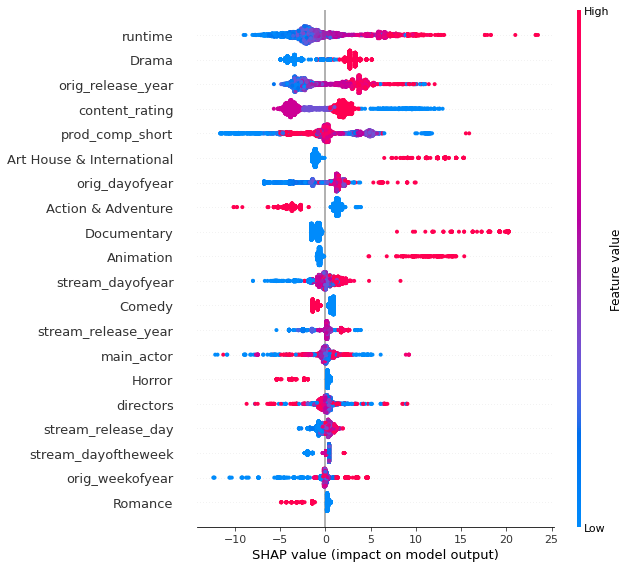

Wall time: 2.02 s


In [ ]:
%%time
xgb_shap_values_CE = shap_test(X_train_CE, X_test_CE, y_train_CE, y_test_CE, mdlXgbMv_CE)

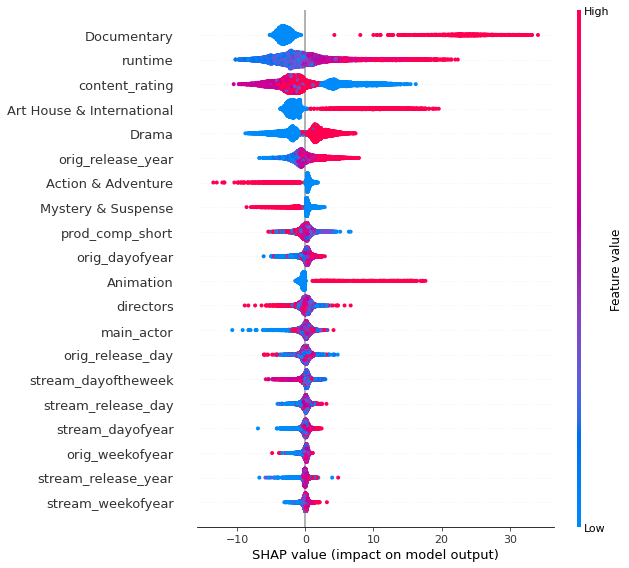

Wall time: 5min 58s


In [ ]:
%%time
rfs_shap_values = shap_test(X_train, X_test, y_train, y_test, mdlRfsMv)

In [ ]:
X_train

,content_rating,directors,runtime,main_actor,prod_comp_short,orig_release_year,orig_release_month,orig_release_day,orig_dayoftheweek,orig_weekofyear,...,Documentary,Classics,Gay & Lesbian,Romance,Sports & Fitness,Anime & Manga,Art House & International,Action & Adventure,Faith & Spirituality,Cult Movies
13268,2,1820,132.0,2055,545,2005.0,9.0,9.0,4.0,36.0,...,0,0,0,0,0,0,1,0,0,0
984,0,4564,96.0,5084,109,1999.0,2.0,28.0,6.0,8.0,...,0,0,0,0,0,0,0,1,0,0
4696,2,2464,90.0,4630,187,2015.0,12.0,11.0,4.0,50.0,...,0,0,0,0,0,0,0,1,0,0
3526,5,2166,104.0,5333,1022,1999.0,4.0,20.0,1.0,16.0,...,0,0,0,0,0,0,0,0,0,0
102,5,2489,96.0,2846,639,2008.0,9.0,1.0,0.0,36.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5089,4,5499,98.0,3444,836,2017.0,11.0,10.0,4.0,45.0,...,0,0,0,0,0,0,0,0,0,0
13319,5,3077,128.0,962,776,2004.0,9.0,17.0,4.0,38.0,...,0,0,0,0,0,0,0,0,0,0
1944,2,5847,87.0,5253,412,2014.0,6.0,6.0,4.0,23.0,...,0,0,0,0,0,0,1,0,0,0
8875,2,2261,86.0,5023,529,2011.0,1.0,28.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0,0


### Score Comparison - XGB CE (5% of Test Set)

In [ ]:
mdlXgbMv.fit(X_train_CE, y_train_CE)
y_test_pred_CE_xgb = mdlXgbMv.predict(X_test_CE)

In [ ]:
y_test_pred_CE_xgb = pd.Series(y_test_pred_CE_xgb, index=y_test_CE.index, name='tomatometer_rating')

In [ ]:
y_test_CE_5pc = y_test_CE.sample(frac=0.05, random_state=5)
y_test_pred_CE_xgb_5pc = y_test_pred_CE_xgb.sample(frac=0.05, random_state=5)

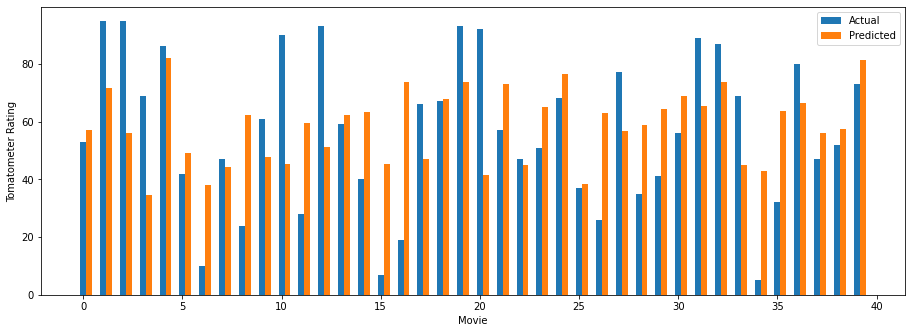

In [ ]:
fig = plt.figure(figsize=[12,4])
ax = fig.add_axes([0,0,1,1])

plot_x = np.arange(len(y_test_5pct_CE))
ax.bar(plot_x, y_test_5pct_CE, width = 0.3)
ax.bar(plot_x+0.3, y_test_pred_5pct_CE, width = 0.3)
ax.set_xlabel('Movie')
ax.set_ylabel('Tomatometer Rating')
ax.legend(['Actual', 'Predicted'])

### Score Comparison - Random Forest, All Movies Since 1998 (5% of Test Set)

In [ ]:
mdlRfsMv.fit(X_train, y_train)
y_test_pred_rfs = mdlRfsMv.predict(X_test)

In [ ]:
y_test_pred_rfs = pd.Series(y_test_pred_rfs, index=y_test.index, name='tomatometer_rating')

In [ ]:
y_test_5pc = y_test.sample(frac=0.05, random_state=5)
y_test_pred_rfs_5pc = y_test_pred_rfs.sample(frac=0.05, random_state=5)

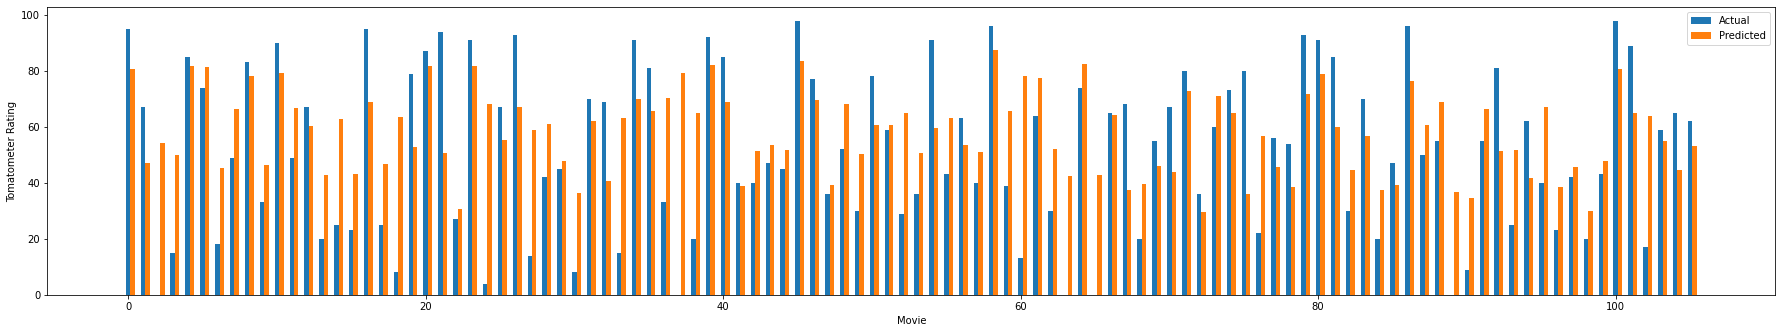

In [ ]:
fig = plt.figure(figsize=[24,4])
ax = fig.add_axes([0,0,1,1])

plot_x = np.arange(len(y_test_5pc))
ax.bar(plot_x, y_test_5pc, width = 0.3)
ax.bar(plot_x+0.3, y_test_pred_rfs_5pc, width = 0.3)
ax.set_xlabel('Movie')
ax.set_ylabel('Tomatometer Rating')
ax.legend(['Actual', 'Predicted'])